In [42]:
librarian::shelf(tidyverse,skimr, tidymodels, corrplot, GGally, viridis, patchwork, scales,
   gridExtra, ggridges, vip, ggbiplot, factoextra, finetune, kernlab, ranger, xgboost, janitor,
    Boruta, PCAtest, summarytools, tictoc, kableExtra, ggpubr, betacal)

In [44]:
cancer_data <- read_csv("datasets/Cancer_Data.csv") %>%
    select(-id, -starts_with("..."))

New names:
• `` -> `...33`
Rows: 568 Columns: 33
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, conc...
lgl  (1): ...33

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat) 


In [2]:
# Set custom theme

theme_custom <- function() {
  theme_minimal() +
    theme(
      plot.background = element_rect(fill = "white", color = NA),
      panel.grid.major = element_line(color = "gray90"),
      panel.grid.minor = element_blank(),
      plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
      plot.subtitle = element_text(size = 12, color = "gray30", hjust = 0.5),
      axis.title = element_text(size = 12, face = "bold"),
      axis.text = element_text(size = 10),
      legend.title = element_text(size = 12, face = "bold"),
      legend.text = element_text(size = 10),
      legend.position = "right"
    )
}

theme_set(theme_custom())



In [45]:
# Convert diagnosis to factor (B = Benign, M = Malignant)
cancer_data <- cancer_data %>% 
  janitor::clean_names() %>% 
  mutate(diagnosis = factor(if_else(diagnosis == "M", "Malignant", "Benign")))

In [49]:


skim(cancer_data) %>% 
  as_tibble() %>% 
  select(-n_missing) %>% 
  kableExtra::kable() %>% 
  kableExtra::kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"), 
  font_size = 12) -> summary_table


<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 12px; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> skim_type </th>
   <th style="text-align:left;"> skim_variable </th>
   <th style="text-align:right;"> complete_rate </th>
   <th style="text-align:left;"> factor.ordered </th>
   <th style="text-align:right;"> factor.n_unique </th>
   <th style="text-align:left;"> factor.top_counts </th>
   <th style="text-align:right;"> numeric.mean </th>
   <th style="text-align:right;"> numeric.sd </th>
   <th style="text-align:right;"> numeric.p0 </th>
   <th style="text-align:right;"> numeric.p25 </th>
   <th style="text-align:right;"> numeric.p50 </th>
   <th style="text-align:right;"> numeric.p75 </th>
   <th style="text-align:right;"> numeric.p100 </th>
   <th style="text-align:left;"> numeric.hist </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> factor </td>
   <td style="text-align:left;"> diagnosis </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> FALSE </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:left;"> Ben: 356, Mal: 212 </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> radius_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 14.1385018 </td>
   <td style="text-align:right;"> 3.5169865 </td>
   <td style="text-align:right;"> 6.981e+00 </td>
   <td style="text-align:right;"> 11.7075000 </td>
   <td style="text-align:right;"> 13.3750000 </td>
   <td style="text-align:right;"> 1.57975e+01 </td>
   <td style="text-align:right;"> 2.811e+01 </td>
   <td style="text-align:left;"> ▂▇▃▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> texture_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 19.2804049 </td>
   <td style="text-align:right;"> 4.2991664 </td>
   <td style="text-align:right;"> 9.710e+00 </td>
   <td style="text-align:right;"> 16.1700000 </td>
   <td style="text-align:right;"> 18.8350000 </td>
   <td style="text-align:right;"> 2.17850e+01 </td>
   <td style="text-align:right;"> 3.928e+01 </td>
   <td style="text-align:left;"> ▃▇▃▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> perimeter_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 92.0465845 </td>
   <td style="text-align:right;"> 24.2498190 </td>
   <td style="text-align:right;"> 4.379e+01 </td>
   <td style="text-align:right;"> 75.2000000 </td>
   <td style="text-align:right;"> 86.2900000 </td>
   <td style="text-align:right;"> 1.04150e+02 </td>
   <td style="text-align:right;"> 1.885e+02 </td>
   <td style="text-align:left;"> ▃▇▃▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> area_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 655.7234155 </td>
   <td style="text-align:right;"> 351.6606424 </td>
   <td style="text-align:right;"> 1.435e+02 </td>
   <td style="text-align:right;"> 420.3000000 </td>
   <td style="text-align:right;"> 551.4000000 </td>
   <td style="text-align:right;"> 7.84150e+02 </td>
   <td style="text-align:right;"> 2.501e+03 </td>
   <td style="text-align:left;"> ▇▃▂▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> smoothness_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0964373 </td>
   <td style="text-align:right;"> 0.0139560 </td>
   <td style="text-align:right;"> 6.251e-02 </td>
   <td style="text-align:right;"> 0.0864000 </td>
   <td style="text-align:right;"> 0.0958950 </td>
   <td style="text-align:right;"> 1.05325e-01 </td>
   <td style="text-align:right;"> 1.634e-01 </td>
   <td style="text-align:left;"> ▂▇▅▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> compactness_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.1044479 </td>
   <td style="text-align:right;"> 0.0527977 </td>
   <td style="text-align:right;"> 1.938e-02 </td>
   <td style="text-align:right;"> 0.0651750 </td>
   <td style="text-align:right;"> 0.0931250 </td>
   <td style="text-align:right;"> 1.30425e-01 </td>
   <td style="text-align:right;"> 3.454e-01 </td>
   <td style="text-align:left;"> ▇▇▂▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> concavity_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0889557 </td>
   <td style="text-align:right;"> 0.0797027 </td>
   <td style="text-align:right;"> 0.000e+00 </td>
   <td style="text-align:right;"> 0.0295750 </td>
   <td style="text-align:right;"> 0.0615450 </td>
   <td style="text-align:right;"> 1.31000e-01 </td>
   <td style="text-align:right;"> 4.268e-01 </td>
   <td style="text-align:left;"> ▇▃▂▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> concave_points_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0490053 </td>
   <td style="text-align:right;"> 0.0387826 </td>
   <td style="text-align:right;"> 0.000e+00 </td>
   <td style="text-align:right;"> 0.0203475 </td>
   <td style="text-align:right;"> 0.0336000 </td>
   <td style="text-align:right;"> 7.40100e-02 </td>
   <td style="text-align:right;"> 2.012e-01 </td>
   <td style="text-align:left;"> ▇▃▂▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> symmetry_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.1812014 </td>
   <td style="text-align:right;"> 0.0274222 </td>
   <td style="text-align:right;"> 1.060e-01 </td>
   <td style="text-align:right;"> 0.1619750 </td>
   <td style="text-align:right;"> 0.1792500 </td>
   <td style="text-align:right;"> 1.95700e-01 </td>
   <td style="text-align:right;"> 3.040e-01 </td>
   <td style="text-align:left;"> ▁▇▅▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> fractal_dimension_mean </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0628046 </td>
   <td style="text-align:right;"> 0.0070646 </td>
   <td style="text-align:right;"> 4.996e-02 </td>
   <td style="text-align:right;"> 0.0576975 </td>
   <td style="text-align:right;"> 0.0615450 </td>
   <td style="text-align:right;"> 6.61275e-02 </td>
   <td style="text-align:right;"> 9.744e-02 </td>
   <td style="text-align:left;"> ▆▇▂▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> radius_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.4052063 </td>
   <td style="text-align:right;"> 0.2775560 </td>
   <td style="text-align:right;"> 1.115e-01 </td>
   <td style="text-align:right;"> 0.2323750 </td>
   <td style="text-align:right;"> 0.3239500 </td>
   <td style="text-align:right;"> 4.79800e-01 </td>
   <td style="text-align:right;"> 2.873e+00 </td>
   <td style="text-align:left;"> ▇▁▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> texture_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 1.2164817 </td>
   <td style="text-align:right;"> 0.5520633 </td>
   <td style="text-align:right;"> 3.602e-01 </td>
   <td style="text-align:right;"> 0.8331500 </td>
   <td style="text-align:right;"> 1.1080000 </td>
   <td style="text-align:right;"> 1.47425e+00 </td>
   <td style="text-align:right;"> 4.885e+00 </td>
   <td style="text-align:left;"> ▇▅▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> perimeter_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 2.8666192 </td>
   <td style="text-align:right;"> 2.0235925 </td>
   <td style="text-align:right;"> 7.570e-01 </td>
   <td style="text-align:right;"> 1.6050000 </td>
   <td style="text-align:right;"> 2.2855000 </td>
   <td style="text-align:right;"> 3.36000e+00 </td>
   <td style="text-align:right;"> 2.198e+01 </td>
   <td style="text-align:left;"> ▇▁▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> area_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 40.3743803 </td>
   <td style="text-align:right;"> 45.5223932 </td>
   <td style="text-align:right;"> 6.802e+00 </td>
   <td style="text-align:right;"> 17.8500000 </td>
   <td style="text-align:right;"> 24.5650000 </td>
   <td style="text-align:right;"> 4.52375e+01 </td>
   <td style="text-align:right;"> 5.422e+02 </td>
   <td style="text-align:left;"> ▇▁▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> smoothness_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0070407 </td>
   <td style="text-align:right;"> 0.0030052 </td>
   <td style="text-align:right;"> 1.713e-03 </td>
   <td style="text-align:right;"> 0.0051662 </td>
   <td style="text-align:right;"> 0.0063745 </td>
   <td style="text-align:right;"> 8.15100e-03 </td>
   <td style="text-align:right;"> 3.113e-02 </td>
   <td style="text-align:left;"> ▇▃▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> compactness_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0255148 </td>
   <td style="text-align:right;"> 0.0179026 </td>
   <td style="text-align:right;"> 2.252e-03 </td>
   <td style="text-align:right;"> 0.0131325 </td>
   <td style="text-align:right;"> 0.0204600 </td>
   <td style="text-align:right;"> 3.24550e-02 </td>
   <td style="text-align:right;"> 1.354e-01 </td>
   <td style="text-align:left;"> ▇▃▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> concavity_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0319499 </td>
   <td style="text-align:right;"> 0.0301829 </td>
   <td style="text-align:right;"> 0.000e+00 </td>
   <td style="text-align:right;"> 0.0150975 </td>
   <td style="text-align:right;"> 0.0259200 </td>
   <td style="text-align:right;"> 4.21175e-02 </td>
   <td style="text-align:right;"> 3.960e-01 </td>
   <td style="text-align:left;"> ▇▁▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> concave_points_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0118169 </td>
   <td style="text-align:right;"> 0.0061558 </td>
   <td style="text-align:right;"> 0.000e+00 </td>
   <td style="text-align:right;"> 0.0076627 </td>
   <td style="text-align:right;"> 0.0109500 </td>
   <td style="text-align:right;"> 1.47300e-02 </td>
   <td style="text-align:right;"> 5.279e-02 </td>
   <td style="text-align:left;"> ▇▇▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> symmetry_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0205314 </td>
   <td style="text-align:right;"> 0.0082695 </td>
   <td style="text-align:right;"> 7.882e-03 </td>
   <td style="text-align:right;"> 0.0151275 </td>
   <td style="text-align:right;"> 0.0187250 </td>
   <td style="text-align:right;"> 2.33975e-02 </td>
   <td style="text-align:right;"> 7.895e-02 </td>
   <td style="text-align:left;"> ▇▃▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> fractal_dimension_se </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0037967 </td>
   <td style="text-align:right;"> 0.0026481 </td>
   <td style="text-align:right;"> 8.948e-04 </td>
   <td style="text-align:right;"> 0.0022445 </td>
   <td style="text-align:right;"> 0.0031955 </td>
   <td style="text-align:right;"> 4.55850e-03 </td>
   <td style="text-align:right;"> 2.984e-02 </td>
   <td style="text-align:left;"> ▇▁▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> radius_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 16.2811849 </td>
   <td style="text-align:right;"> 4.8290176 </td>
   <td style="text-align:right;"> 7.930e+00 </td>
   <td style="text-align:right;"> 13.0250000 </td>
   <td style="text-align:right;"> 14.9700000 </td>
   <td style="text-align:right;"> 1.87950e+01 </td>
   <td style="text-align:right;"> 3.604e+01 </td>
   <td style="text-align:left;"> ▆▇▃▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> texture_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 25.6689613 </td>
   <td style="text-align:right;"> 6.1485120 </td>
   <td style="text-align:right;"> 1.202e+01 </td>
   <td style="text-align:right;"> 21.0750000 </td>
   <td style="text-align:right;"> 25.4050000 </td>
   <td style="text-align:right;"> 2.96750e+01 </td>
   <td style="text-align:right;"> 4.954e+01 </td>
   <td style="text-align:left;"> ▃▇▆▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> perimeter_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 107.3458979 </td>
   <td style="text-align:right;"> 33.5713334 </td>
   <td style="text-align:right;"> 5.041e+01 </td>
   <td style="text-align:right;"> 84.1475000 </td>
   <td style="text-align:right;"> 97.6650000 </td>
   <td style="text-align:right;"> 1.25525e+02 </td>
   <td style="text-align:right;"> 2.512e+02 </td>
   <td style="text-align:left;"> ▇▇▃▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> area_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 881.6605634 </td>
   <td style="text-align:right;"> 569.2779734 </td>
   <td style="text-align:right;"> 1.852e+02 </td>
   <td style="text-align:right;"> 515.6750000 </td>
   <td style="text-align:right;"> 686.5500000 </td>
   <td style="text-align:right;"> 1.08500e+03 </td>
   <td style="text-align:right;"> 4.254e+03 </td>
   <td style="text-align:left;"> ▇▂▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> smoothness_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.1324433 </td>
   <td style="text-align:right;"> 0.0227829 </td>
   <td style="text-align:right;"> 7.117e-02 </td>
   <td style="text-align:right;"> 0.1166000 </td>
   <td style="text-align:right;"> 0.1313500 </td>
   <td style="text-align:right;"> 1.46025e-01 </td>
   <td style="text-align:right;"> 2.226e-01 </td>
   <td style="text-align:left;"> ▂▇▇▂▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> compactness_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.2545992 </td>
   <td style="text-align:right;"> 0.1572729 </td>
   <td style="text-align:right;"> 2.729e-02 </td>
   <td style="text-align:right;"> 0.1475750 </td>
   <td style="text-align:right;"> 0.2130000 </td>
   <td style="text-align:right;"> 3.39300e-01 </td>
   <td style="text-align:right;"> 1.058e+00 </td>
   <td style="text-align:left;"> ▇▅▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> concavity_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.2726677 </td>
   <td style="text-align:right;"> 0.2084945 </td>
   <td style="text-align:right;"> 0.000e+00 </td>
   <td style="text-align:right;"> 0.1159250 </td>
   <td style="text-align:right;"> 0.2274500 </td>
   <td style="text-align:right;"> 3.83500e-01 </td>
   <td style="text-align:right;"> 1.252e+00 </td>
   <td style="text-align:left;"> ▇▅▂▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> concave_points_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.1148080 </td>
   <td style="text-align:right;"> 0.0656137 </td>
   <td style="text-align:right;"> 0.000e+00 </td>
   <td style="text-align:right;"> 0.0649675 </td>
   <td style="text-align:right;"> 0.1000150 </td>
   <td style="text-align:right;"> 1.61675e-01 </td>
   <td style="text-align:right;"> 2.910e-01 </td>
   <td style="text-align:left;"> ▅▇▅▃▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> symmetry_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.2900808 </td>
   <td style="text-align:right;"> 0.0619219 </td>
   <td style="text-align:right;"> 1.565e-01 </td>
   <td style="text-align:right;"> 0.2503500 </td>
   <td style="text-align:right;"> 0.2820500 </td>
   <td style="text-align:right;"> 3.18025e-01 </td>
   <td style="text-align:right;"> 6.638e-01 </td>
   <td style="text-align:left;"> ▅▇▁▁▁ </td>
  </tr>
  <tr>
   <td style="text-align:left;"> numeric </td>
   <td style="text-align:left;"> fractal_dimension_worst </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:right;"> 0.0839697 </td>
   <td style="text-align:right;"> 0.0180682 </td>
   <td style="text-align:right;"> 5.504e-02 </td>
   <td style="text-align:right;"> 0.0714675 </td>
   <td style="text-align:right;"> 0.0800500 </td>
   <td style="text-align:right;"> 9.20825e-02 </td>
   <td style="text-align:right;"> 2.075e-01 </td>
   <td style="text-align:left;"> ▇▃▁▁▁ </td>
  </tr>
</tbody>
</table>

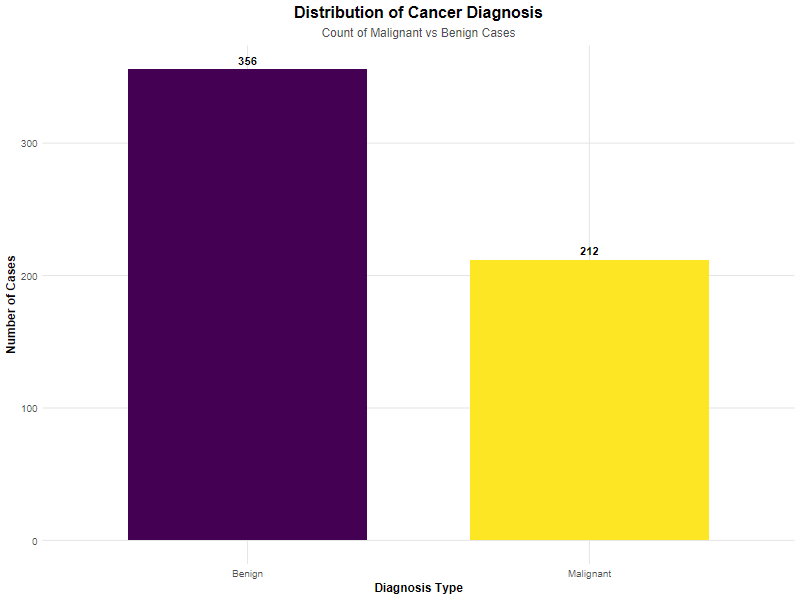

In [50]:
# 1.1 Class Distribution
diagnosis_counts <- cancer_data %>% 
  count(diagnosis) %>%
  mutate(percentage = n / sum(n) * 100)

ggplot(cancer_data, aes(diagnosis, fill = diagnosis)) +
    geom_bar(width = 0.7) +
    geom_text(stat = "count", 
             aes(label = after_stat(count)),
             vjust = -0.5,
             size = 4, fontface = "bold") +
    scale_fill_viridis_d(option = "D") +
    labs(title = "Distribution of Cancer Diagnosis",
       subtitle = "Count of Malignant vs Benign Cases",
       x = "Diagnosis Type",
       y = "Number of Cases") +
    theme_custom() +
    theme(legend.position = "none") -> diagnosis_plot

diagnosis_plot

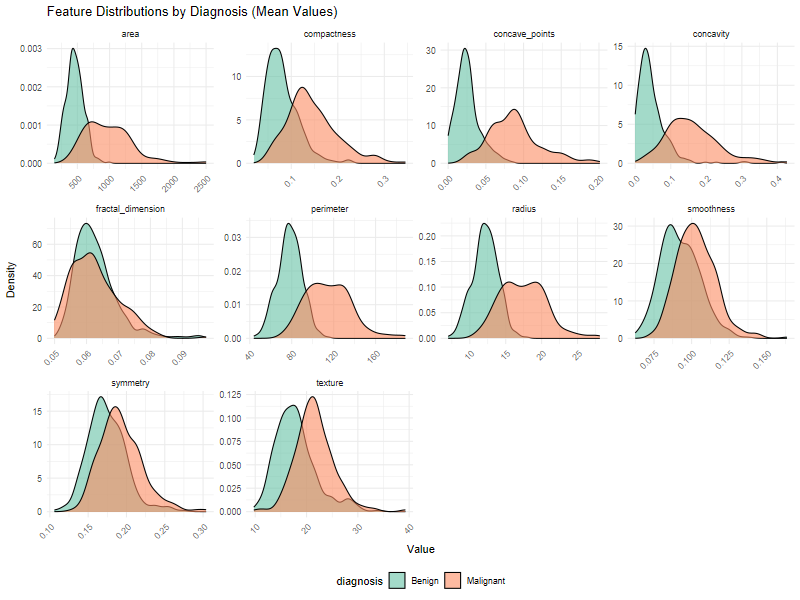

In [51]:
# 1.2 Feature Distribution by Diagnosis (for mean features)
# Let's reshape the cancer_data for visualization
mean_features <- cancer_data %>%
  select(diagnosis, contains("_mean")) %>%
  pivot_longer(cols = -diagnosis, 
               names_to = "feature", 
               values_to = "value") %>%
  mutate(feature = str_remove(feature, "_mean"))

# Visualize mean feature distributions
p2 <- ggplot(mean_features, aes(x = value, fill = diagnosis)) +
  geom_density(alpha = 0.6) +
  facet_wrap(~ feature, scales = "free") +
  labs(title = "Feature Distributions by Diagnosis (Mean Values)",
       x = "Value", y = "Density") +
  scale_fill_manual(values = c("Benign" = "#66c2a5", "Malignant" = "#fc8d62")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom")

p2


Attaching package: ‘corrr’

The following object is masked from ‘package:skimr’:

    focus

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


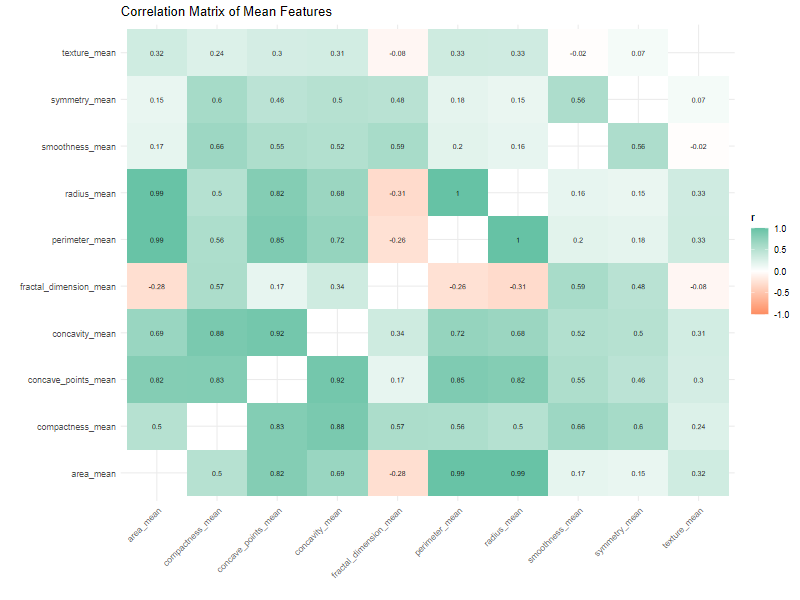

In [52]:
library(corrr)
# 1.3 Correlation Analysis (mean features)
corr_matrix <- cancer_data %>%
  select(contains("_mean")) %>%
  correlate() %>%
  rearrange()

# Visualize correlation matrix
p3 <- corr_matrix %>%
  stretch() %>%
  filter(abs(r) > 0.0) %>%
  ggplot(aes(x = x, y = y, fill = r)) +
  geom_tile() +
  geom_text(aes(label = round(r, 2)), size = 2.5) +
  scale_fill_gradient2(low = "#fc8d62", mid = "white", high = "#66c2a5", 
                       midpoint = 0, limits = c(-1, 1)) +
  labs(title = "Correlation Matrix of Mean Features",
       x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p3

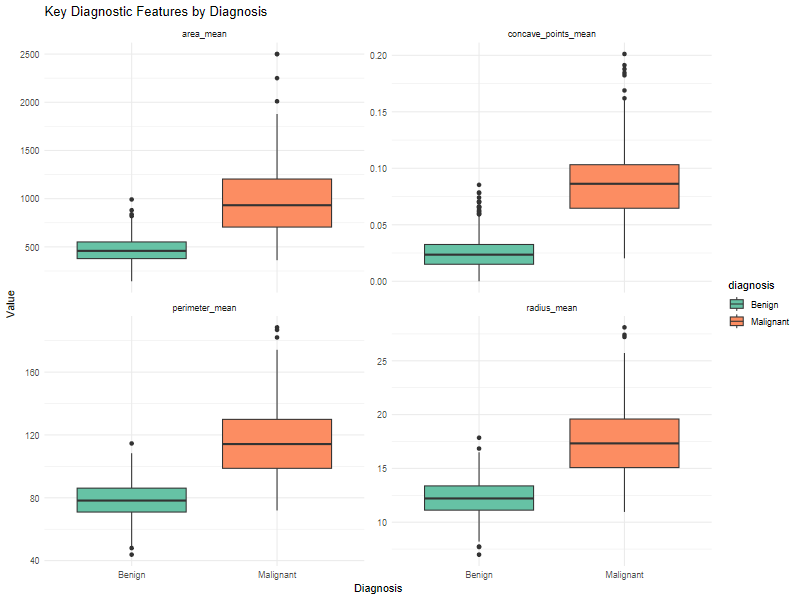

In [53]:
# 1.4 Box plots for key diagnostic features
key_features <- c("radius_mean", "concave_points_mean", "perimeter_mean", "area_mean")
key_cancer_data <- cancer_data %>%
  select(diagnosis, all_of(key_features)) %>%
  pivot_longer(cols = -diagnosis, 
               names_to = "feature", 
               values_to = "value")

p4 <- ggplot(key_cancer_data, aes(x = diagnosis, y = value, fill = diagnosis)) +
  geom_boxplot() +
  facet_wrap(~ feature, scales = "free_y") +
  labs(title = "Key Diagnostic Features by Diagnosis",
       x = "Diagnosis", y = "Value") +
  scale_fill_manual(values = c("Benign" = "#66c2a5", "Malignant" = "#fc8d62")) +
  theme_minimal()

p4

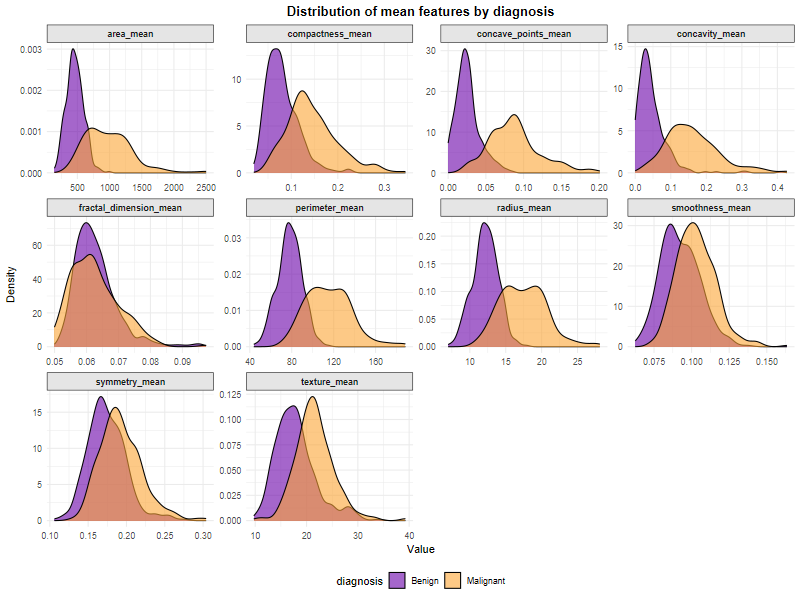

In [54]:
options(repr.plot.height = 12, repr.plot.width = 12)
# select mean features for visualization
mean_features <- cancer_data %>%
  select(diagnosis, contains("mean"))

# Reshape cancer_data for visualization
mean_features_long <- mean_features %>%
  pivot_longer(cols = -diagnosis, 
               names_to = "feature", 
               values_to = "Value")

# Strip "mean_" prefix for cleaner visualization
mean_features_long$feature <- gsub("mean_", "", mean_features_long$feature)

# Create density plots for each feature by diagnosis
ggplot(mean_features_long, aes(x = Value, fill = diagnosis)) +
  geom_density(alpha = 0.6) +
  facet_wrap(~ feature, scales = "free") +
  theme_minimal() +
  labs(title = "Distribution of mean features by diagnosis",
       X = "Value", y = "Density") +
  scale_fill_viridis_d(option = "plasma", begin = 0.2, end = 0.8) +
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        strip.background = element_rect(fill = "gray90"),
        strip.text = element_text(face = "bold")) -> p5

p5

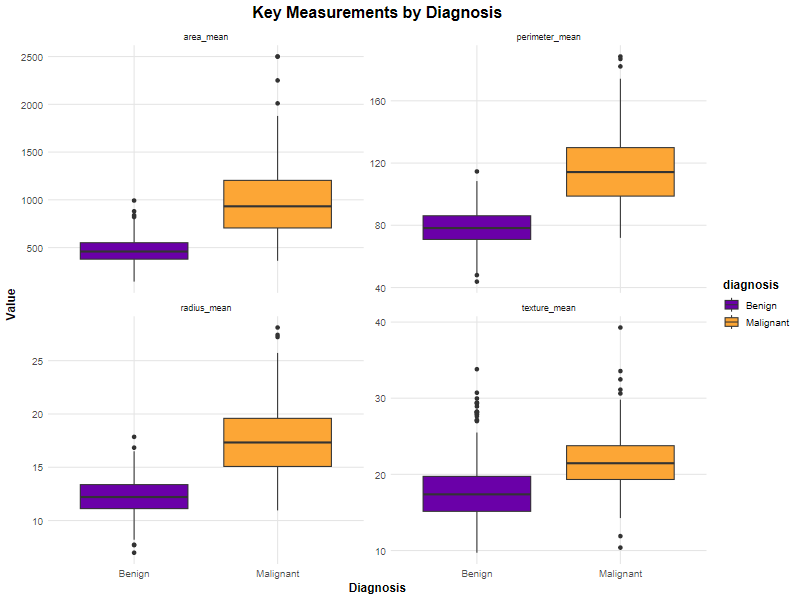

In [55]:
cancer_data %>%
  pivot_longer(cols = c(radius_mean, texture_mean, perimeter_mean, area_mean),
               names_to = "measurement",
               values_to = "value") %>%
  ggplot(aes(x = diagnosis, y = value, fill = diagnosis)) +
  geom_boxplot() +
  facet_wrap(~measurement, scales = "free_y") +
  theme_custom() +
  scale_fill_viridis_d(option = "plasma", begin = 0.2, end = 0.8) +
  labs(title = "Key Measurements by Diagnosis",
       
       x = "Diagnosis",
       y = "Value") -> p6

p6

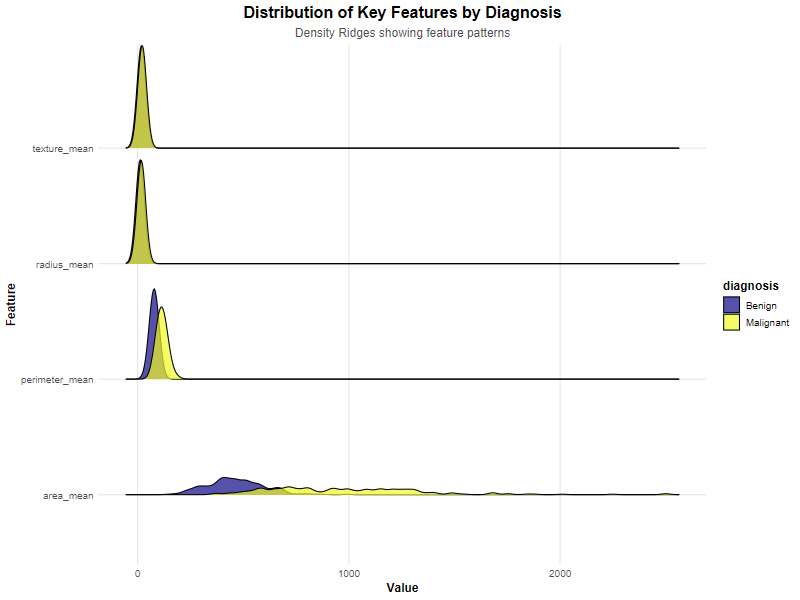

Picking joint bandwidth of 20.3

In [56]:
## Feature Density

selected_features <- c("radius_mean", "texture_mean", "perimeter_mean", "area_mean")

cancer_data %>%
    pivot_longer(cols = all_of(selected_features),
               names_to = "feature",
               values_to = "value") %>%
    ggplot(aes(value, feature, fill = diagnosis)) +
    geom_density_ridges(alpha = 0.7, scale = 0.9) +
    scale_fill_viridis_d(option = "C") +
    labs(title = "Distribution of Key Features by Diagnosis",
       subtitle = "Density Ridges showing feature patterns",
       x = "Value",
       y = "Feature") +
    theme_custom() -> p7

p7

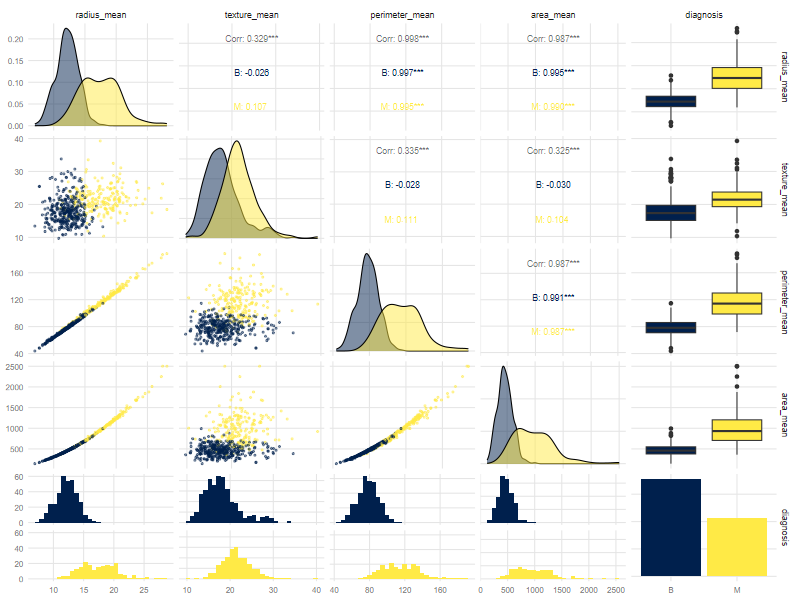

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

In [12]:
## Scatter Matrix

cancer_data %>%
    select(all_of(selected_features), diagnosis) %>%
    ggpairs(aes(color = diagnosis),
                  upper = list(continuous = wrap("cor", size = 3)),
                  diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
                  lower = list(continuous = wrap("points", alpha = 0.5, size = 0.8))) +
    scale_fill_viridis_d(option = "E") +
    scale_color_viridis_d(option = "E") +
    theme_custom() +
    theme(axis.text = element_text(size = 8)) -> scatter_matrix
scatter_matrix

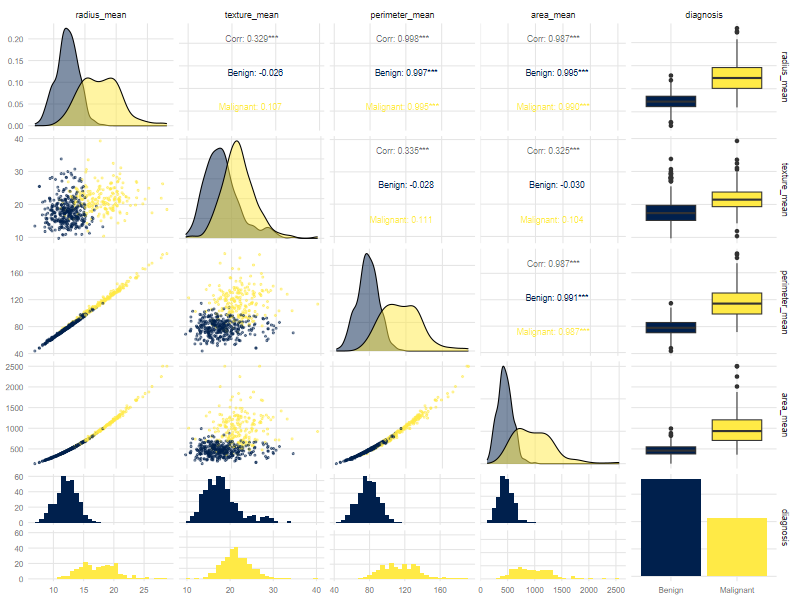

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

In [57]:
## Scatter Matrix

cancer_data %>%
    select(all_of(selected_features), diagnosis) %>%
    ggpairs(aes(color = diagnosis),
                  upper = list(continuous = wrap("cor", size = 3)),
                  diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
                  lower = list(continuous = wrap("points", alpha = 0.5, size = 0.8))) +
    scale_fill_viridis_d(option = "E") +
    scale_color_viridis_d(option = "E") +
    theme_custom() +
    theme(axis.text = element_text(size = 8)) -> p8

p8

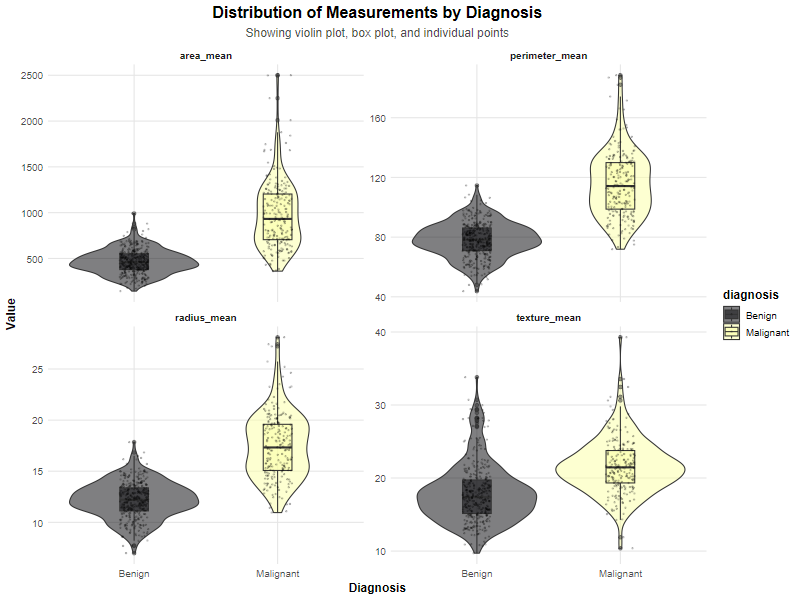

In [58]:
cancer_data %>%
  pivot_longer(cols = all_of(selected_features),
               names_to = "measurement",
               values_to = "value") %>%
  ggplot(aes(diagnosis, value, fill = diagnosis)) +
  geom_violin(alpha = 0.5) +
  geom_boxplot(width = 0.2, alpha = 0.5) +
  geom_jitter(alpha = 0.2, width = 0.1, size = 0.5) +
  facet_wrap(~measurement, scales = "free_y",
            labeller = labeller(measurement = label_wrap_gen(10))) +
  scale_fill_viridis_d(option = "B") +
  labs(title = "Distribution of Measurements by Diagnosis",
       subtitle = "Showing violin plot, box plot, and individual points",
       x = "Diagnosis",
       y = "Value") +
  theme_custom() +
  theme(strip.text = element_text(size = 10, face = "bold")) -> p9

p9

## Feature importance and selection

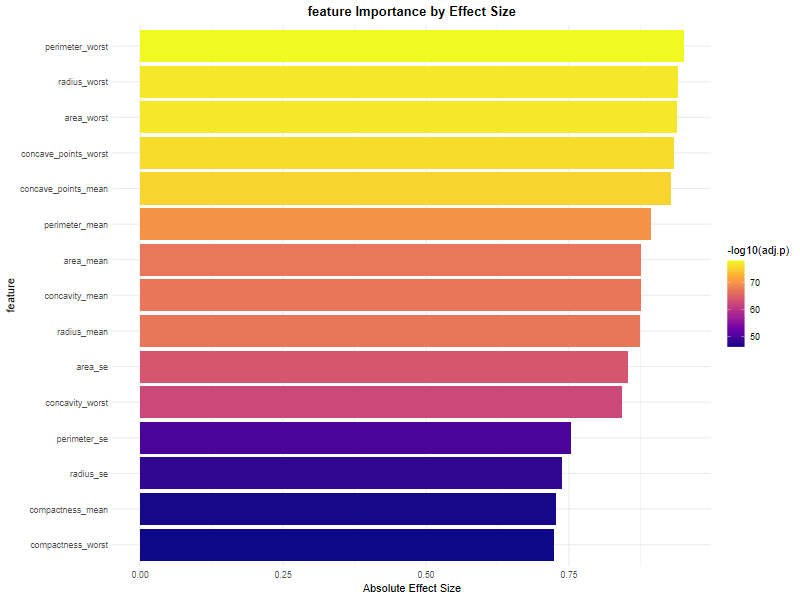

In [65]:
library(effsize)
# Wilcoxon rank-sum test for each feature
feature_importance <- data.frame(
  feature = character(),
  p_value = numeric(),
  effect_size = numeric(),
  stringsAsFactors = FALSE
)

numeric_features <- names(cancer_data)[names(cancer_data) != "diagnosis"]

for (feature in numeric_features) {
  # Wilcoxon test
  test_result <- wilcox.test(cancer_data[[feature]] ~ cancer_data$diagnosis)
  
  # Calculate effect size (Cliff’s delta)
  cliff_delta <- cliff.delta(cancer_data[[feature]], cancer_data$diagnosis)
  
  # Store results
feature_importance <- rbind(feature_importance, 
                             data.frame(feature = feature,
                                        p_value = test_result$p.value,
                                        effect_size = cliff_delta$estimate))
}

# Adjust p-values for multiple testing
feature_importance$p_adjusted <- p.adjust(feature_importance$p_value, method = "BH")

# Sort by effect size
feature_importance <- feature_importance %>%
  arrange(p_adjusted, desc(abs(effect_size)))

# Display top features
feature_importance %>%
  head(15) %>%
  mutate(p_value = format(p_value, scientific = TRUE, digits = 3),
         p_adjusted = format(p_adjusted, scientific = TRUE, digits = 3),
         effect_size = round(effect_size, 3)) %>%
  kable(caption = "top features by Statistical Significance and Effect Size") %>%
  scroll_box(width = "500px", height = "200px")-> feature_importance_tbl

# Visualize feature importance
feature_importance %>%
  head(15) %>%
  mutate(feature = reorder(feature, abs(effect_size))) %>%
  ggplot(aes(x = abs(effect_size), y = feature, fill = -log10(as.numeric(p_adjusted)))) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "feature Importance by Effect Size",
       x = "Absolute Effect Size", 
       y = "feature",
       fill = "-log10(adj.p)") +
  scale_fill_viridis_c(option = "plasma") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) -> p10

p10



<div style="border: 1px solid #ddd; padding: 0px; overflow-y: scroll; height:200px; overflow-x: scroll; width:500px; "><table>
<caption>top features by Statistical Significance and Effect Size</caption>
 <thead>
  <tr>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;"> feature </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;"> p_value </th>
   <th style="text-align:right;position: sticky; top:0; background-color: #FFFFFF;"> effect_size </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;"> p_adjusted </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> perimeter_worst </td>
   <td style="text-align:left;"> 3.29e-80 </td>
   <td style="text-align:right;"> -0.951 </td>
   <td style="text-align:left;"> 9.87e-79 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> radius_worst </td>
   <td style="text-align:left;"> 1.45e-78 </td>
   <td style="text-align:right;"> -0.941 </td>
   <td style="text-align:left;"> 2.18e-77 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> area_worst </td>
   <td style="text-align:left;"> 2.31e-78 </td>
   <td style="text-align:right;"> -0.939 </td>
   <td style="text-align:left;"> 2.31e-77 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> concave_points_worst </td>
   <td style="text-align:left;"> 2.40e-77 </td>
   <td style="text-align:right;"> -0.933 </td>
   <td style="text-align:left;"> 1.80e-76 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> concave_points_mean </td>
   <td style="text-align:left;"> 1.30e-76 </td>
   <td style="text-align:right;"> -0.929 </td>
   <td style="text-align:left;"> 7.79e-76 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> perimeter_mean </td>
   <td style="text-align:left;"> 4.67e-71 </td>
   <td style="text-align:right;"> -0.893 </td>
   <td style="text-align:left;"> 2.34e-70 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> area_mean </td>
   <td style="text-align:left;"> 2.04e-68 </td>
   <td style="text-align:right;"> -0.876 </td>
   <td style="text-align:left;"> 8.75e-68 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> concavity_mean </td>
   <td style="text-align:left;"> 2.87e-68 </td>
   <td style="text-align:right;"> -0.875 </td>
   <td style="text-align:left;"> 1.08e-67 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> radius_mean </td>
   <td style="text-align:left;"> 3.57e-68 </td>
   <td style="text-align:right;"> -0.875 </td>
   <td style="text-align:left;"> 1.19e-67 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> area_se </td>
   <td style="text-align:left;"> 7.33e-65 </td>
   <td style="text-align:right;"> -0.853 </td>
   <td style="text-align:left;"> 2.20e-64 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> concavity_worst </td>
   <td style="text-align:left;"> 2.37e-63 </td>
   <td style="text-align:right;"> -0.842 </td>
   <td style="text-align:left;"> 6.47e-63 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> perimeter_se </td>
   <td style="text-align:left;"> 4.90e-51 </td>
   <td style="text-align:right;"> -0.753 </td>
   <td style="text-align:left;"> 1.23e-50 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> radius_se </td>
   <td style="text-align:left;"> 5.82e-49 </td>
   <td style="text-align:right;"> -0.737 </td>
   <td style="text-align:left;"> 1.34e-48 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> compactness_mean </td>
   <td style="text-align:left;"> 1.25e-47 </td>
   <td style="text-align:right;"> -0.727 </td>
   <td style="text-align:left;"> 2.68e-47 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> compactness_worst </td>
   <td style="text-align:left;"> 2.93e-47 </td>
   <td style="text-align:right;"> -0.724 </td>
   <td style="text-align:left;"> 5.86e-47 </td>
  </tr>
</tbody>
</table></div>

## Statistical tests and Analysis


### Mann-Whitney U tests (Wilcoxon Rank-Sum tests)

Let’s formally test the differences between benign and malignant groups for key features.


In [67]:
# select top 8 features based on effect size
top_features <- feature_importance$feature[1:8]

# Create a table of test results
test_results <- data.frame(
  feature = character(),
  benign_median = numeric(),
  malignant_median = numeric(),
  w_statistic = numeric(),
  p_value = numeric(),
  adj_p_value = numeric(),
  effect_size = numeric(),
  stringsAsFactors = FALSE
)

for (feature in top_features) {
  # Extract cancer_data for each group
  benign_values <- cancer_data[cancer_data$diagnosis == "Benign", feature][[1]]
  malignant_values <- cancer_data[cancer_data$diagnosis == "Malignant", feature][[1]]
  
  # Perform Wilcoxon rank-sum test
  test <- wilcox.test(benign_values, malignant_values)
  
  # Calculate effect size
  cliff <- cliff.delta(cancer_data[[feature]], cancer_data$diagnosis)
  
  # Store results
  test_results <- rbind(test_results,
                       data.frame(feature = feature,
                                  benign_median = median(benign_values),
                                  malignant_median = median(malignant_values),
                                  w_statistic = test$statistic,
                                  p_value = test$p.value,
                                  adj_p_value = NA,  # Will adjust later
                                  effect_size = cliff$estimate))
}

# Adjust p-values for multiple testing
test_results$adj_p_value <- p.adjust(test_results$p_value, method = "BH")

test_results %>%
  mutate(
    feature = gsub("_", " ", feature),
    benign_median = round(benign_median, 3),
    malignant_media = round(malignant_median, 3),
    w_statistic = round(w_statistic, 1),
    p_value = format(p_value, scientific = TRUE, digits = 3),
    adj_p_value = format(adj_p_value, scientific = TRUE, digits = 3),
    effect_size = round(effect_size, 3)) -> test_results_formatted

# Display table
test_results_formatted %>%
  kable(caption = "Mann-Whitney U test Results for top features") %>%
  kable_styling(bootstrap_options = c("striped", "hover")) -> test_results_formatted

<table class="table table-striped table-hover" style="margin-left: auto; margin-right: auto;">
<caption>Mann-Whitney U test Results for top features</caption>
 <thead>
  <tr>
   <th style="text-align:left;">  </th>
   <th style="text-align:left;"> feature </th>
   <th style="text-align:right;"> benign_median </th>
   <th style="text-align:right;"> malignant_median </th>
   <th style="text-align:right;"> w_statistic </th>
   <th style="text-align:left;"> p_value </th>
   <th style="text-align:left;"> adj_p_value </th>
   <th style="text-align:right;"> effect_size </th>
   <th style="text-align:right;"> malignant_media </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> W </td>
   <td style="text-align:left;"> perimeter worst </td>
   <td style="text-align:right;"> 86.945 </td>
   <td style="text-align:right;"> 138.00000 </td>
   <td style="text-align:right;"> 1858.0 </td>
   <td style="text-align:left;"> 3.29e-80 </td>
   <td style="text-align:left;"> 2.63e-79 </td>
   <td style="text-align:right;"> -0.951 </td>
   <td style="text-align:right;"> 138.000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W1 </td>
   <td style="text-align:left;"> radius worst </td>
   <td style="text-align:right;"> 13.350 </td>
   <td style="text-align:right;"> 20.59000 </td>
   <td style="text-align:right;"> 2237.0 </td>
   <td style="text-align:left;"> 1.45e-78 </td>
   <td style="text-align:left;"> 5.82e-78 </td>
   <td style="text-align:right;"> -0.941 </td>
   <td style="text-align:right;"> 20.590 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W2 </td>
   <td style="text-align:left;"> area worst </td>
   <td style="text-align:right;"> 547.600 </td>
   <td style="text-align:right;"> 1303.00000 </td>
   <td style="text-align:right;"> 2283.5 </td>
   <td style="text-align:left;"> 2.31e-78 </td>
   <td style="text-align:left;"> 6.17e-78 </td>
   <td style="text-align:right;"> -0.939 </td>
   <td style="text-align:right;"> 1303.000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W3 </td>
   <td style="text-align:left;"> concave points worst </td>
   <td style="text-align:right;"> 0.074 </td>
   <td style="text-align:right;"> 0.18200 </td>
   <td style="text-align:right;"> 2520.0 </td>
   <td style="text-align:left;"> 2.40e-77 </td>
   <td style="text-align:left;"> 4.80e-77 </td>
   <td style="text-align:right;"> -0.933 </td>
   <td style="text-align:right;"> 0.182 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W4 </td>
   <td style="text-align:left;"> concave points mean </td>
   <td style="text-align:right;"> 0.024 </td>
   <td style="text-align:right;"> 0.08628 </td>
   <td style="text-align:right;"> 2691.5 </td>
   <td style="text-align:left;"> 1.30e-76 </td>
   <td style="text-align:left;"> 2.08e-76 </td>
   <td style="text-align:right;"> -0.929 </td>
   <td style="text-align:right;"> 0.086 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W5 </td>
   <td style="text-align:left;"> perimeter mean </td>
   <td style="text-align:right;"> 78.225 </td>
   <td style="text-align:right;"> 114.20000 </td>
   <td style="text-align:right;"> 4019.0 </td>
   <td style="text-align:left;"> 4.67e-71 </td>
   <td style="text-align:left;"> 6.23e-71 </td>
   <td style="text-align:right;"> -0.893 </td>
   <td style="text-align:right;"> 114.200 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W6 </td>
   <td style="text-align:left;"> area mean </td>
   <td style="text-align:right;"> 458.550 </td>
   <td style="text-align:right;"> 932.00000 </td>
   <td style="text-align:right;"> 4668.5 </td>
   <td style="text-align:left;"> 2.04e-68 </td>
   <td style="text-align:left;"> 2.33e-68 </td>
   <td style="text-align:right;"> -0.876 </td>
   <td style="text-align:right;"> 932.000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> W7 </td>
   <td style="text-align:left;"> concavity mean </td>
   <td style="text-align:right;"> 0.037 </td>
   <td style="text-align:right;"> 0.15135 </td>
   <td style="text-align:right;"> 4705.5 </td>
   <td style="text-align:left;"> 2.87e-68 </td>
   <td style="text-align:left;"> 2.87e-68 </td>
   <td style="text-align:right;"> -0.875 </td>
   <td style="text-align:right;"> 0.151 </td>
  </tr>
</tbody>
</table>

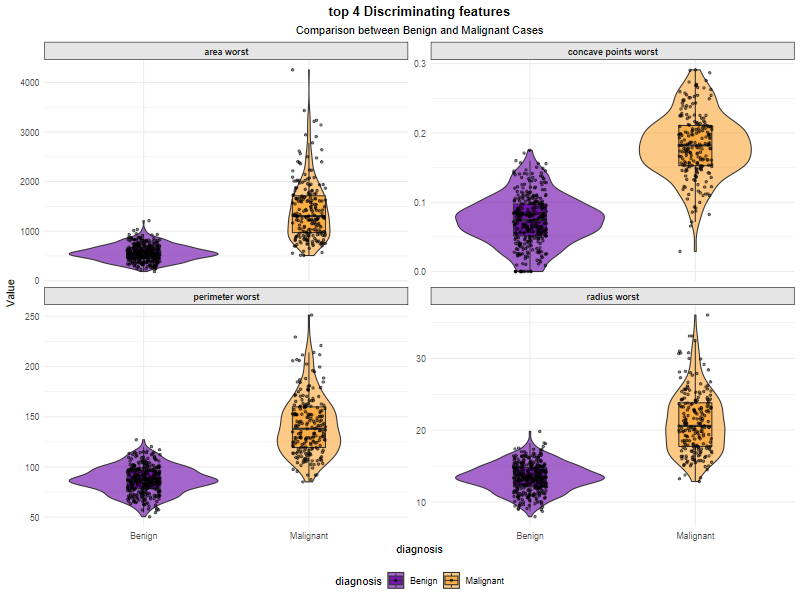

In [69]:
options(repr.plot.height = 12, repr.plot.width = 12)
# select top 4 features for visualization
top4_features <- feature_importance$feature[1:4]

# Reshape data for visualization
top4_long <- cancer_data %>%
  select(diagnosis, all_of(top4_features)) %>%
  pivot_longer(cols = -diagnosis, 
               names_to = "feature", 
               values_to = "Value")

# Clean feature names for visualization
top4_long$feature <- gsub("_", " ", top4_long$feature)

# Create violin plots with box plots and individual points
ggplot(top4_long, aes(x = diagnosis, y = Value, fill = diagnosis)) +
  geom_violin(alpha = 0.6) +
  geom_boxplot(width = 0.2, alpha = 0.8, outlier.shape = NA) +
  geom_jitter(width = 0.1, alpha = 0.5, size = 1) +
  facet_wrap(~ feature, scales = "free_y", ncol = 2) +
  theme_minimal() +
  labs(title = "top 4 Discriminating features",
       subtitle = "Comparison between Benign and Malignant Cases",
       X = "", y = "Value") +
  scale_fill_viridis_d(option = "plasma", begin = 0.2, end = 0.8) +
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        strip.background = element_rect(fill = "gray90"),
        strip.text = element_text(face = "bold"))

## Hypothesis Tests and Effect Sizes

### Hypothesis 1: Malignant tumors have significantly different mean radius compared to benign tumors

$H_o$: No difference in radius_mean between malignant and benign tumors

$H_1$: There is a significant difference in radius_mean between tumor types

In [70]:
library(effectsize)

radius_test <- function(data) {
  # Test for normality
  shapiro_test_m <- shapiro.test(data$radius_mean[data$diagnosis == "Malignant"])
  shapiro_test_b <- shapiro.test(data$radius_mean[data$diagnosis == "Benign"])
  
  # If normal, use t-test; if not, use Mann-Whitney
  if (shapiro_test_m$p.value > 0.05 && shapiro_test_b$p.value > 0.05) {
    test_result <- t.test(radius_mean ~ diagnosis, data = data)
    effect <- cohens_d(radius_mean ~ diagnosis, data = data)
  } else {
    test_result <- wilcox.test(radius_mean ~ diagnosis, data = data)
    effect <- rank_biserial(radius_mean ~ diagnosis, data = data)
  }
  
  list(test = test_result, effect_size = effect)
}

radius_test(cancer_data)

$test

	Wilcoxon rank sum test with continuity correction

data:  radius_mean by diagnosis
W = 4729, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


$effect_size
r (rank biserial) |         95% CI
----------------------------------
-0.87             | [-0.90, -0.85]



### Hypothesis 2: There are significant differences in cell characteristics across multiple features¶

MANOVA test for multiple dependent variables


In [71]:
manova_test <- function(data) {
  dependent_vars <- data %>% 
    select(radius_mean, texture_mean, perimeter_mean, area_mean)
  
  manova_result <- manova(as.matrix(dependent_vars) ~ diagnosis, data = data)
  summary(manova_result)
}

manova_test(cancer_data)

           Df Pillai approx F num Df den Df    Pr(>F)    
diagnosis   1 0.6182    227.9      4    563 < 2.2e-16 ***
Residuals 566                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


---------------------
Welcome to dendextend version 1.19.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:ggpubr’:

    rotate

The following object is masked from ‘package:dials’:

    prune

The following object is masked from ‘package:stats’:

    cutree



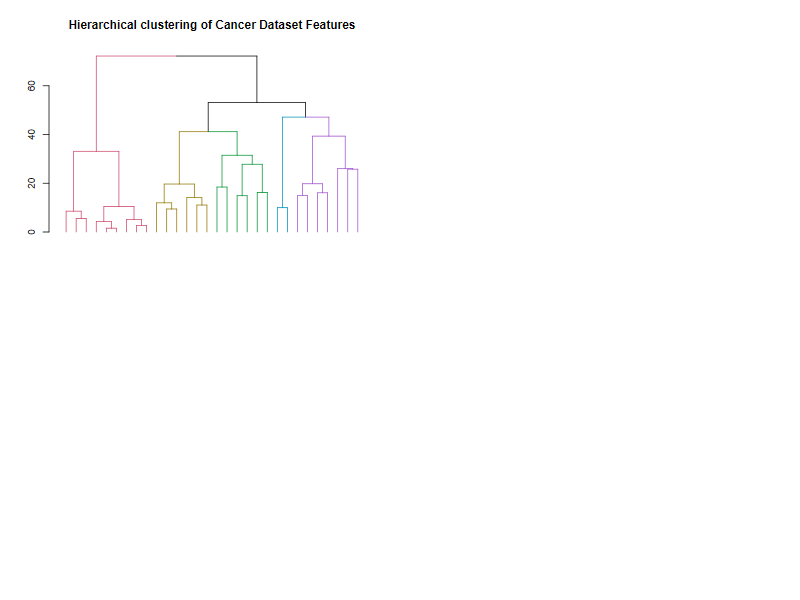

In [72]:
library(dendextend)
# Hierarchical feature clustering

feature_dist <- dist(t(scale(cancer_data %>% 
  select(-diagnosis))))
feature_hclust <- hclust(feature_dist, method = "ward.D2")
feature_dend <- as.dendrogram(feature_hclust)
feature_dend <- color_branches(feature_dend, k = 5)
plot(feature_dend, main = "Hierarchical clustering of Cancer Dataset Features")

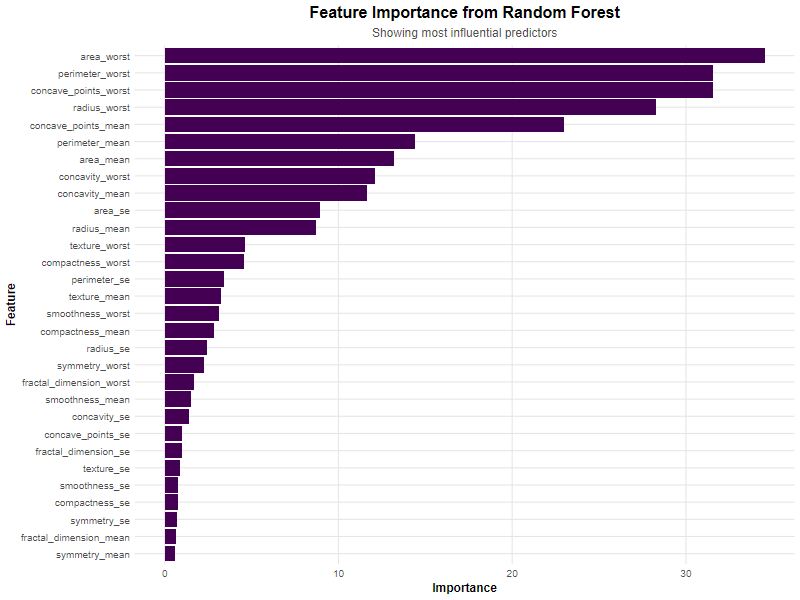

In [74]:
## Feature Importance plot
rf_recipe <- recipe(diagnosis ~ ., data = cancer_data) %>%
  step_normalize(all_predictors())

rf_model <- rand_forest() %>%
  set_engine("ranger", importance = "impurity") %>%
  set_mode("classification")

rf_wflow <- workflow() %>%
  add_recipe(rf_recipe) %>%
  add_model(rf_model)

rf_fit <- rf_wflow %>%
  fit(data = cancer_data)

rf_fit %>%
 extract_fit_parsnip() %>%
 vi() %>%
 mutate(Variable = fct_reorder(Variable, Importance)) -> importance_data

ggplot(importance_data, aes(Importance, Variable)) +
  geom_bar(stat = "identity", fill = viridis(1)) +
  labs(title = "Feature Importance from Random Forest",
       subtitle = "Showing most influential predictors",
       x = "Importance",
       y = "Feature") +
  theme_custom() -> importance_plot

importance_plot

## Predictive Modelling

In [133]:
# Prepare data for modeling
set.seed(123)
splits <- initial_split(cancer_data, prop = 0.75, strata = diagnosis)
training <- training(splits)
testing <- testing(splits)

# Check class distribution in training and testing sets
train_distribution <- table(training$diagnosis)
test_distribution <- table(testing$diagnosis)

cv_folds <- vfold_cv(training, v = 10, strata = diagnosis)
train_distribution_df <- as.data.frame(train_distribution)
colnames(train_distribution_df) <- c("diagnosis", "count")
train_distribution_df$Percentage <- train_distribution_df$count / sum(train_distribution_df$count) * 100

test_distribution_df <- as.data.frame(test_distribution)
colnames(test_distribution_df) <- c("diagnosis", "count")
test_distribution_df$Percentage <- test_distribution_df$count / sum(test_distribution_df$count) * 100

# Display class distribution
cat("training Set Distribution:\n")
train_distribution_df %>%
  kable() %>% 
  print()

cat("\ntesting Set Distribution:\n")
test_distribution_df %>%
  kable() %>% 
  print()

training Set Distribution:


|diagnosis | count| Percentage|
|:---------|-----:|----------:|
|Benign    |   267|   62.67606|
|Malignant |   159|   37.32394|

testing Set Distribution:


|diagnosis | count| Percentage|
|:---------|-----:|----------:|
|Benign    |    89|   62.67606|
|Malignant |    53|   37.32394|


## Logistic Regression model

In [134]:
library(car)
logistic_reg_glm_spec <-
  logistic_reg() %>%
  set_engine('glm')

# select features for the model based on our analysis
# Use top features and avoid highly correlated ones
model_features <- c("concavity_mean", "concave_points_mean", "perimeter_mean", 
                   "texture_mean", "smoothness_mean", "symmetry_mean")

# Formula for the model
formula <- as.formula(paste("diagnosis ~", paste(model_features, collapse = " + ")))

log_reg_fit <- logistic_reg_glm_spec %>% 
  fit(formula, data = training)
# Fit logistic regression model
#logistic_model <- glm(formula, data = training, family = "binomial")

# Model summary
summary(log_reg_fit$fit)

# Check for multicollinearity
vif_values <- vif(log_reg_fit$fit)
vif_df <- data.frame(
  feature = names(vif_values),
  Vif = vif_values
)

# Display Vif values
vif_df %>%
  arrange(desc(Vif)) %>%
  kable(caption = "Variance Inflation Factors (Vif) for Model features") %>%
  kable_styling(bootstrap_options = c("striped", "hover")) -> vif_df



In [82]:
# Check for multicollinearity
vif_values <- vif(log_reg_fit$fit)
vif_df <- data.frame(
  feature = names(vif_values),
  Vif = vif_values
)

# Display Vif values
vif_df %>%
  arrange(desc(Vif)) %>%
  kable(caption = "Variance Inflation Factors (Vif) for Model features") %>%
  kable_styling(bootstrap_options = c("striped", "hover")) -> vif_df

<table class="table table-striped table-hover" style="margin-left: auto; margin-right: auto;">
<caption>Variance Inflation Factors (Vif) for Model features</caption>
 <thead>
  <tr>
   <th style="text-align:left;">  </th>
   <th style="text-align:left;"> feature </th>
   <th style="text-align:right;"> Vif </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> concave_points_mean </td>
   <td style="text-align:left;"> concave_points_mean </td>
   <td style="text-align:right;"> 5.831716 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> smoothness_mean </td>
   <td style="text-align:left;"> smoothness_mean </td>
   <td style="text-align:right;"> 4.407593 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> concavity_mean </td>
   <td style="text-align:left;"> concavity_mean </td>
   <td style="text-align:right;"> 3.363412 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> perimeter_mean </td>
   <td style="text-align:left;"> perimeter_mean </td>
   <td style="text-align:right;"> 2.752074 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> symmetry_mean </td>
   <td style="text-align:left;"> symmetry_mean </td>
   <td style="text-align:right;"> 2.126114 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> texture_mean </td>
   <td style="text-align:left;"> texture_mean </td>
   <td style="text-align:right;"> 1.948744 </td>
  </tr>
</tbody>
</table>

### Model Evaluation

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Setting levels: control = Benign, case = Malignant
Setting direction: controls < cases


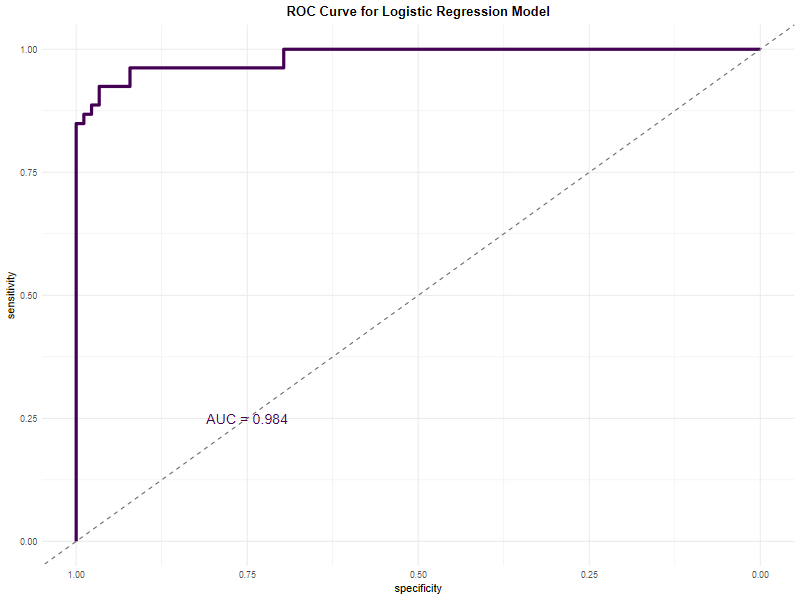

In [83]:
library(pROC)
# Make predictions on test set
predictions <- predict(log_reg_fit, new_data = testing) %>% 
  bind_cols(testing)
probabilities <- predict(log_reg_fit, testing, type = "prob") %>% 
  bind_cols(testing)
# Confusion matrix
conf_matrix <- conf_mat(predictions, truth = diagnosis, estimate= .pred_class)
conf_matrix

calculate_metrics <- function(pred_df, truth_col, pred_col) {
  # Convert column names to symbols
  truth_sym <- sym(truth_col)
  pred_sym <- sym(pred_col)
  
  # Ensure the columns are factors with the same levels
  pred_df <- pred_df %>%
    mutate(
      !!truth_col := factor(!!truth_sym),
      !!pred_col := factor(!!pred_sym)
    )
  
  # Calculate metrics one by one to avoid errors
  acc <- pred_df %>% accuracy(truth = !!truth_sym, estimate = !!pred_sym)
  sens <- pred_df %>% sensitivity(truth = !!truth_sym, estimate = !!pred_sym, event_level = "second")
  spec <- pred_df %>% specificity(truth = !!truth_sym, estimate = !!pred_sym, event_level = "second")
  ppv_val <- pred_df %>% ppv(truth = !!truth_sym, estimate = !!pred_sym, event_level = "second")
  npv_val <- pred_df %>% npv(truth = !!truth_sym, estimate = !!pred_sym, event_level = "second")
  f1 <- pred_df %>% f_meas(truth = !!truth_sym, estimate = !!pred_sym, event_level = "second")
  
  # Combine all metrics
  bind_rows(
    acc,
    sens,
    spec,
    ppv_val,
    npv_val,
    f1
  )
}

metrics_table <- calculate_metrics(
   pred_df = predictions,
   truth_col = "diagnosis", 
   pred_col = ".pred_class"
 ) %>% 
  select(.metric, .estimate) %>% 
  rename(metric = .metric, value = .estimate)

# Display metrics
metrics_table %>%
  mutate(value = round(value, 4)) %>%
  kable(caption = "Model Performance Metrics")


roc_obj <- roc(testing$diagnosis, probabilities$.pred_Malignant)
auc_value <- auc(roc_obj)
# plot ROC curve
ggroc(roc_obj, colour = "#440154", size = 1.5) +
  geom_abline(intercept = 1, slope = 1, linetype = "dashed", color = "gray40") +
  annotate("text", x = 0.75, y = 0.25, 
           label = paste("AUC =", round(auc_value, 3)), 
           size = 5, color = "#440154") +
  theme_minimal() +
  labs(title = "ROC Curve for Logistic Regression Model",
       X = "False Positive Rate (1 – Specificity)",
       Y = "True Positive Rate (Sensitivity)") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Feature Importance in model

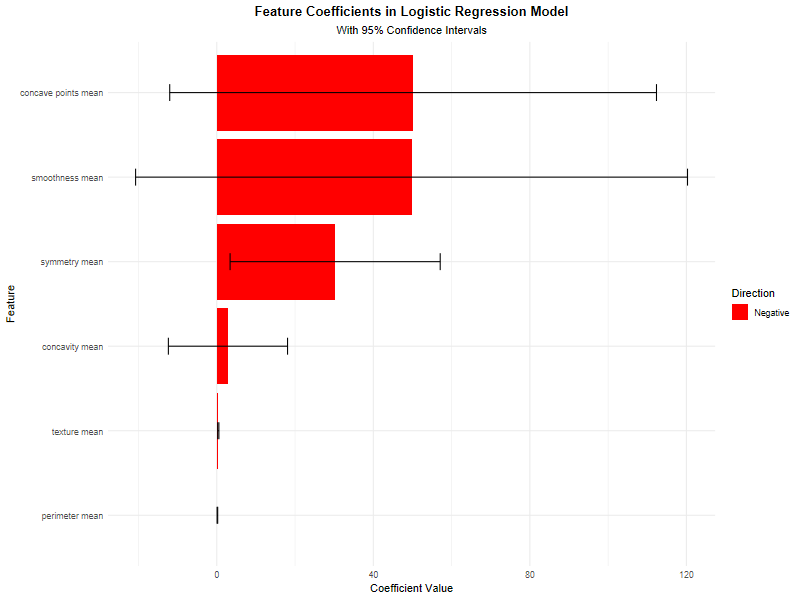

In [90]:
# Extract coefficients
coefs <- tidy(log_reg_fit)
coef_df <- data.frame(
  feature = coefs$term,
  coefficient = coefs$estimate,
  std_Error = coefs$std.error,
  z_value = coefs$statistic,
  p_value = coefs$p.value
)

# Remove intercept
coef_df <- coef_df[-1, ]

# Calculate odds ratios
coef_df <- coef_df %>%
  mutate(
    Odds_Ratio = exp(coefficient),
    OR_Lower_CI = exp(coefficient - 1.96 * std_Error),
    OR_Upper_CI = exp(coefficient + 1.96 * std_Error),
    Significance = case_when(
      p_value < 0.001 ~ "***",
      p_value < 0.01  ~ "**",
      p_value < 0.05  ~ "*",
      TRUE            ~ ""
    )
  )

# Format feature names
coef_df$feature <- gsub("_", " ", coef_df$feature)

# Order by absolute coefficient value
coef_df <- coef_df %>% arrange(desc(abs(coefficient)))

# Create formatted table
coef_table <- coef_df %>%
  mutate(
    Odds_Ratio = round(Odds_Ratio, 3),
    OR_Lower_CI = round(OR_Lower_CI, 3),
    OR_Upper_CI = round(OR_Upper_CI, 3),
    P_value = format(p_value, scientific = TRUE, digits = 3),
    `95% CI` = paste0("(", OR_Lower_CI, " – ", OR_Upper_CI, ")")
  ) %>%
  select(feature, Odds_Ratio, '95% CI', p_value, Significance) %>%
  kable(caption = "Odds Ratios for Model Features") %>%
  kable_styling(bootstrap_options = c("striped", "hover"))

# Visualize coefficients
ggplot(coef_df, aes(x = coefficient, y = reorder(feature, abs(coefficient)), fill = coefficient > 0)) +
  geom_bar(stat = "identity") +
  geom_errorbarh(aes(xmin = coefficient - 1.96 * std_Error, 
                     xmax = coefficient + 1.96 * std_Error), 
                 height = 0.2) +
  theme_minimal() +
  labs(title = "Feature Coefficients in Logistic Regression Model",
       subtitle = "With 95% Confidence Intervals",
       x = "Coefficient Value", 
       y = "Feature") +
  scale_fill_manual(values = c("red", "blue"), 
                    name = "Direction", 
                    labels = c("Negative", "Positive")) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5)) -> feature_coefs_plot
feature_coefs_plot

<table class="table table-striped table-hover" style="margin-left: auto; margin-right: auto;">
<caption>Odds Ratios for Model Features</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> feature </th>
   <th style="text-align:right;"> Odds_Ratio </th>
   <th style="text-align:left;"> 95% CI </th>
   <th style="text-align:right;"> p_value </th>
   <th style="text-align:left;"> Significance </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> concave points mean </td>
   <td style="text-align:right;"> 6.122968e+21 </td>
   <td style="text-align:left;"> (0 – 6.26583290229668e+48) </td>
   <td style="text-align:right;"> 0.1138813 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> smoothness mean </td>
   <td style="text-align:right;"> 4.124302e+21 </td>
   <td style="text-align:left;"> (0 – 1.73917752928599e+52) </td>
   <td style="text-align:right;"> 0.1665475 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> symmetry mean </td>
   <td style="text-align:right;"> 1.368952e+13 </td>
   <td style="text-align:left;"> (30.014 – 6.24385098633511e+24) </td>
   <td style="text-align:right;"> 0.0272197 </td>
   <td style="text-align:left;"> * </td>
  </tr>
  <tr>
   <td style="text-align:left;"> concavity mean </td>
   <td style="text-align:right;"> 1.739600e+01 </td>
   <td style="text-align:left;"> (0 – 71380948.654) </td>
   <td style="text-align:right;"> 0.7131359 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> texture mean </td>
   <td style="text-align:right;"> 1.470000e+00 </td>
   <td style="text-align:left;"> (1.264 – 1.708) </td>
   <td style="text-align:right;"> 0.0000005 </td>
   <td style="text-align:left;"> *** </td>
  </tr>
  <tr>
   <td style="text-align:left;"> perimeter mean </td>
   <td style="text-align:right;"> 1.170000e+00 </td>
   <td style="text-align:left;"> (1.084 – 1.263) </td>
   <td style="text-align:right;"> 0.0000574 </td>
   <td style="text-align:left;"> *** </td>
  </tr>
</tbody>
</table>

# Modelling with PCA

In [135]:
features <- cancer_data %>%
 select(-diagnosis)

target <- cancer_data$diagnosis

In [19]:
# Perform PCA
pca_result <- prcomp(features, scale. = TRUE)
summarize_pca <- function(pca_obj){
  # Calculate variance explained
  var_explained <- pca_obj$sdev^2 / sum(pca_obj$sdev^2)
  cum_var_explained <- cumsum(var_explained)

  # Create summary dataframe
  pca_summary <- data.frame(
    PC = paste0("PC", 1:length(var_explained)),
    var_explained = var_explained,
    cum_var_explained = cum_var_explained)
  
  return(pca_summary)
}

pca_summary <- summarize_pca(pca_result)

# Plot Scree Plot
plot_scree <- function(pca_summary){
  ggplot(pca_summary, aes(PC)) +
    geom_line(aes(y = var_explained), fill = viridis(1)) +
    geom_col(aes(y = cum_var_explained, group = 1), color = "red") +
    geom_point(aes(y = cum_var_explained), color = "red") +
    scale_y_continuous(
      name = "Proportion of Variance Explained",
      sec.axis = sec_axis(~., name = "Cumulative Proportion")
    ) +
    labs(title = "Scree Plot with Cumulative Variance",
          x = "Principal Component") +
    theme_custom() +
    theme(axis.text.x = element_text(angle = 45))
}

plot_pca_biplot <- function(pca_obj, data, target) {
  # Get PC scores
  scores <- as.data.frame(pca_obj$x)
  scores$diagnosis <- target
  
  # Create biplot
  ggplot(scores, aes(x = PC1, y = PC2, color = diagnosis)) +
    geom_point(alpha = 0.6) +
    stat_ellipse(level = 0.95) +
    scale_color_viridis_d() +
    labs(title = "PCA Biplot",
         x = paste0("PC1 (", round(pca_summary$var_explained[1] * 100, 1), "%)"),
         y = paste0("PC2 (", round(pca_summary$var_explained[2] * 100, 1), "%)")) +
    theme_minimal()
}

# Calculate feature contributions
feature_contributions <- as.data.frame(abs(pca_result$rotation)) %>%
  mutate(feature = rownames(.)) %>%
  pivot_longer(-feature, names_to = "PC", values_to = "contribution")

# Plot feature contributions
plot_feature_contributions <- function(feature_contributions) {
  feature_contributions %>%
    filter(PC %in% c("PC1", "PC2", "PC3")) %>%
    ggplot(aes(x = reorder(feature, contribution), y = contribution, fill = PC)) +
    geom_col(position = "dodge") +
    coord_flip() +
    scale_fill_viridis_d() +
    labs(title = "Feature Contributions to Principal Components",
         x = "Feature",
         y = "Absolute Contribution") +
    theme_minimal()
}

Warning message:
In geom_line(aes(y = var_explained), fill = viridis(1)) :
  Ignoring unknown parameters: `fill`


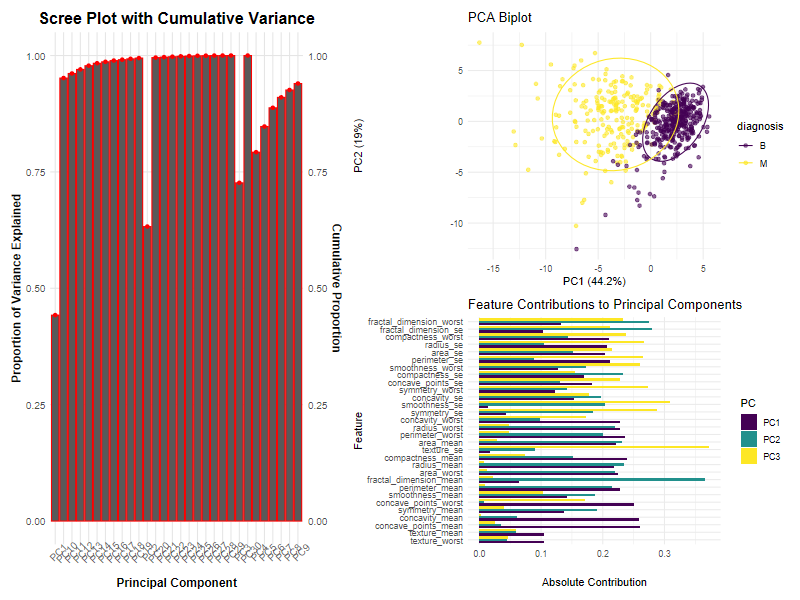

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?

In [20]:
plot_scree(pca_summary) + plot_pca_biplot(pca_result, cancer_data, cancer_data$diagnosis) / plot_feature_contributions(feature_contributions)

[1] "Summary of Kaiser Criterion Analysis:"
[1] "Number of components suggested by Kaiser criterion: 6"
[1] "Cumulative variance explained by Kaiser components: 88.77 %"
[1] "\nDetailed Component Analysis:"
  Component Eigenvalue Variance_Explained Meets_Kaiser
1       PC1  13.271102         0.44237008         TRUE
2       PC2   5.705847         0.19019489         TRUE
3       PC3   2.818852         0.09396173         TRUE
4       PC4   1.975260         0.06584200         TRUE
5       PC5   1.655397         0.05517989         TRUE
6       PC6   1.205956         0.04019852         TRUE


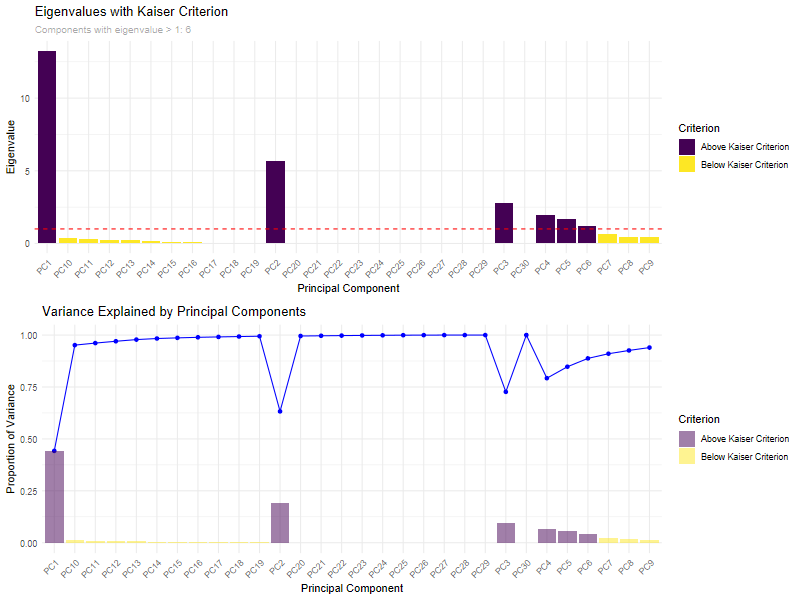

In [26]:
# Function to perform PCA analysis with Kaiser criterion
analyze_pca_kaiser <- function(data) {
  # Perform PCA
  pca_result <- prcomp(data, scale. = TRUE)
  
  # Calculate eigenvalues
  eigenvalues <- pca_result$sdev^2
  
  # Create Kaiser criterion analysis
  kaiser_analysis <- data.frame(
    Component = paste0("PC", 1:length(eigenvalues)),
    Eigenvalue = eigenvalues,
    Variance_Explained = eigenvalues / sum(eigenvalues),
    Cumulative_Variance = cumsum(eigenvalues / sum(eigenvalues)),
    Meets_Kaiser = eigenvalues > 1
  ) %>%
    mutate(
      Criterion = ifelse(Meets_Kaiser, "Above Kaiser Criterion", "Below Kaiser Criterion")
    )
  
  # Count components meeting Kaiser criterion
  n_components_kaiser <- sum(eigenvalues > 1)
  
  # Create visualization
  kaiser_plot <- ggplot(kaiser_analysis, aes(x = Component, y = Eigenvalue, fill = Criterion)) +
    geom_col() +
    geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
    scale_fill_viridis_d() +
    labs(
      title = "Eigenvalues with Kaiser Criterion",
      subtitle = paste("Components with eigenvalue > 1:", n_components_kaiser),
      x = "Principal Component",
      y = "Eigenvalue"
    ) +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1),
      plot.subtitle = element_text(size = 10, color = "darkgray")
    )
  
  # Create variance explained plot
  variance_plot <- ggplot(kaiser_analysis, aes(x = Component)) +
    geom_line(aes(y = Cumulative_Variance, group = 1), color = "blue") +
    geom_point(aes(y = Cumulative_Variance), color = "blue") +
    geom_col(aes(y = Variance_Explained, fill = Criterion), alpha = 0.5) +
    scale_fill_viridis_d() +
    labs(
      title = "Variance Explained by Principal Components",
      x = "Principal Component",
      y = "Proportion of Variance"
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Calculate summary statistics
  summary_stats <- list(
    n_components_kaiser = n_components_kaiser,
    variance_explained_kaiser = sum(kaiser_analysis$Variance_Explained[kaiser_analysis$Meets_Kaiser]),
    components_summary = kaiser_analysis
  )
  
  # Return results
  return(list(
    pca_result = pca_result,
    kaiser_analysis = kaiser_analysis,
    kaiser_plot = kaiser_plot,
    variance_plot = variance_plot,
    summary_stats = summary_stats
  ))
}


# Prepare data for PCA (remove ID and target variable)
pca_data <- cancer_data %>%
  select(-diagnosis)

# Perform analysis
pca_analysis <- analyze_pca_kaiser(pca_data)

# Print summary
print("Summary of Kaiser Criterion Analysis:")
print(paste("Number of components suggested by Kaiser criterion:",
            pca_analysis$summary_stats$n_components_kaiser))
print(paste("Cumulative variance explained by Kaiser components:",
            round(pca_analysis$summary_stats$variance_explained_kaiser * 100, 2), "%"))

# Display full component summary
print("\nDetailed Component Analysis:")
print(pca_analysis$kaiser_analysis %>%
        select(Component, Eigenvalue, Variance_Explained, Meets_Kaiser) %>%
        head(pca_analysis$summary_stats$n_components_kaiser))

# Combine plots
combined_plot <- gridExtra::grid.arrange(
  pca_analysis$kaiser_plot,
  pca_analysis$variance_plot,
  ncol = 1
)

# Function to get rotations for Kaiser-selected components
get_kaiser_components <- function(pca_result, kaiser_analysis) {
  n_components <- sum(kaiser_analysis$Meets_Kaiser)
  
  # Get rotation matrix for selected components
  rotations <- pca_result$rotation[, 1:n_components, drop = FALSE]
  
  # Create summary dataframe
  rotation_summary <- as.data.frame(rotations) %>%
    mutate(Feature = rownames(.)) %>%
    pivot_longer(
      cols = -Feature,
      names_to = "Component",
      values_to = "Loading"
    ) %>%
    arrange(Component, desc(abs(Loading)))
  
  return(rotation_summary)
}

# Get loadings for Kaiser components
kaiser_loadings <- get_kaiser_components(pca_analysis$pca_result, 
                                       pca_analysis$kaiser_analysis)

# Create loadings plot
loadings_plot <- kaiser_loadings %>%
  ggplot(aes(x = reorder(Feature, abs(Loading)), y = Loading, fill = Loading)) +
  geom_col() +
  facet_wrap(~Component) +
  scale_fill_viridis() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(
    title = "Feature Loadings for Kaiser-Selected Components",
    x = "Feature",
    y = "Loading"
  )

# Return results as a list
results <- list(
  analysis = pca_analysis,
  loadings = kaiser_loadings,
  loadings_plot = loadings_plot
)

In [96]:
# Create the PCA recipe
pca_prep <- recipe(diagnosis~., data =training) |> 
  step_normalize(all_predictors()) |> 
  step_pca(all_predictors(), num_comp = 6) |> 
  prep()

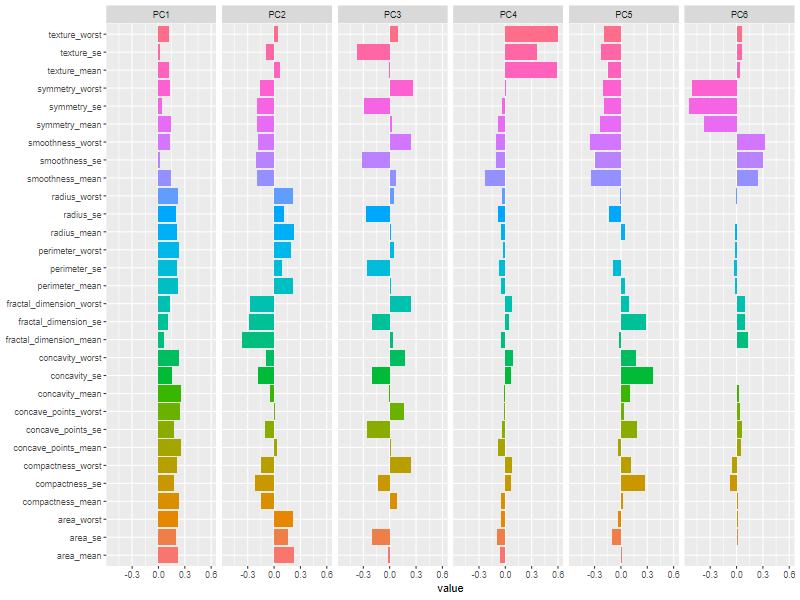

In [97]:
# Visualize the contribution of variables to the components

tidied_pca <- tidy(pca_prep, 2)
tidied_pca |> 
  filter(component %in% paste0("PC", 1:6)) |> 
  mutate(component = fct_inorder(component)) |> 
  ggplot(aes(value, terms, fill = terms)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~component, nrow = 1)+
  labs(y = NULL)

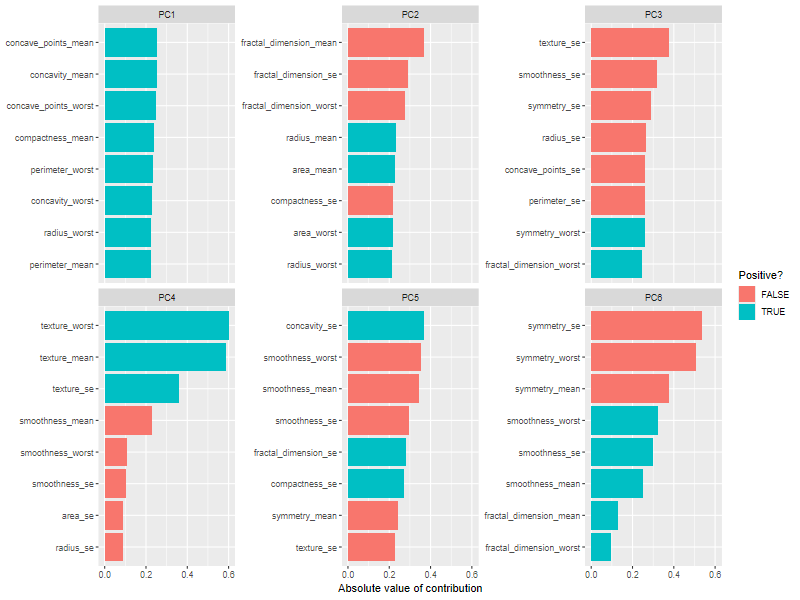

In [98]:
library(tidytext)

tidied_pca %>%
  filter(component %in% paste0("PC", 1:6)) %>%
  group_by(component) %>%
  top_n(8, abs(value)) %>%
  ungroup() %>%
  mutate(terms = reorder_within(terms, abs(value), component)) %>%
  ggplot(aes(abs(value), terms, fill = value > 0)) +
  geom_col() +
  facet_wrap(~component, scales = "free_y") +
  scale_y_reordered() +
  labs(
    x = "Absolute value of contribution",
    y = NULL, fill = "Positive?"
  )

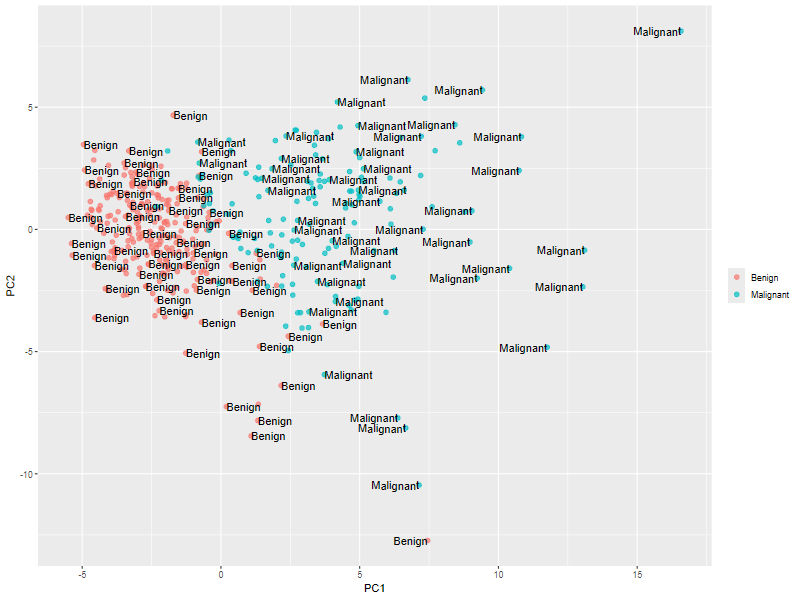

In [99]:
juice(pca_prep) %>%
  ggplot(aes(PC1, PC2, label = diagnosis)) +
  geom_point(aes(color = diagnosis), alpha = 0.7, size = 2) +
  geom_text(check_overlap = TRUE, hjust = "inward", family = "IBMPlexSans") +
  labs(color = NULL)

In [136]:
cancer_recipe <- recipe(diagnosis ~ ., data = training) %>%
  # Remove highly correlated features
  step_corr(all_predictors(), threshold = 0.9) %>%
  # Center and scale all predictors
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) %>%
  # Handle class imbalance
  themis::step_smote(diagnosis) %>%
  # Perform principal component analysis for dimension reduction and for visualization
  step_pca(all_predictors(), num_comp = 6, prefix = "PC")

In [137]:
library(doParallel)
library(earth)
library(baguette)
library(discrim)
cl <- makePSOCKcluster(detectCores() - 1)
registerDoParallel(cl)

tic()
rf_spec <- rand_forest(
  mtry = tune(),
  trees = 1000,
  min_n = tune()
) %>%
  set_engine("ranger", importance = "impurity") %>%
  set_mode("classification")


xgb_spec <- boost_tree(
  trees = 1000,
  tree_depth = tune(),
  min_n = tune(),
  loss_reduction = tune(),
  sample_size = tune(),
  mtry = tune(),
  learn_rate = tune()
) %>%
  set_engine("xgboost") %>%
  set_mode("classification")

svm_spec <- svm_rbf(
  cost = tune(),
  rbf_sigma = tune()
) %>%
  set_engine("kernlab") %>%
  set_mode("classification")

log_spec <- logistic_reg(
  penalty = tune(),
  mixture = tune()
) %>%
  set_engine("glmnet") %>%
  set_mode("classification")

bart_spec <-
  bart(trees = tune(), prior_terminal_node_coef = tune(), prior_terminal_node_expo = tune(), prior_outcome_range = tune()) %>%
  set_engine('dbarts') %>%
  set_mode('classification')

dt_spec <-
  decision_tree(tree_depth = tune(), min_n = tune(), cost_complexity = tune()) %>%
  set_engine('rpart') %>%
  set_mode('classification')

nnet_spec <-
  mlp(hidden_units = tune(), penalty = tune(), epochs = tune()) %>%
  set_engine('nnet') %>%
  set_mode('classification')

naivebayes_spec <-
  naive_Bayes(smoothness = tune(), Laplace = tune()) %>%
  set_engine('naivebayes') %>% 
  set_mode("classification")

kknn_spec <-
  nearest_neighbor(neighbors = tune(), weight_func = tune(), dist_power = tune()) %>%
  set_engine('kknn') %>%
  set_mode('classification')


# Define workflow sets
cancer_workflows <- workflow_set(
  preproc = list(cancer_recipe),
  models = list(
    rf = rf_spec,
    logistic = log_spec,
    svm = svm_spec,
    xgb = xgb_spec,
    bart = bart_spec,
    decision_tree = dt_spec,
    nnet = nnet_spec,
    naivebayes = naivebayes_spec,
    nearest_neighbors = kknn_spec
  )
)

metrics <- metric_set(yardstick::accuracy, roc_auc, yardstick::sensitivity, yardstick::specificity, brier_class)

race_ctrl <- control_race(
  save_pred = TRUE,
  parallel_over = "everything",
  save_workflow = TRUE
)
race_results <- cancer_workflows %>%
  workflow_map(
    seed = 42,
    fn = "tune_race_anova",
    resamples = cv_folds,
    grid = 25,
    metrics = metrics,
    control = race_ctrl
  )
stopCluster(cl)
toc()
# Compare model performance


i Creating pre-processing data to finalize unknown parameter: mtry
i Creating pre-processing data to finalize unknown parameter: mtry
643.65 sec elapsed


In [138]:
race_results <- race_results %>% 
  mutate(wflow_id = gsub("recipe_", "", wflow_id))
race_results

# A workflow set/tibble: 9 × 4
  wflow_id          info             option    result   
  <chr>             <list>           <list>    <list>   
1 rf                <tibble [1 × 4]> <opts[4]> <race[+]>
2 logistic          <tibble [1 × 4]> <opts[4]> <race[+]>
3 svm               <tibble [1 × 4]> <opts[4]> <race[+]>
4 xgb               <tibble [1 × 4]> <opts[4]> <race[+]>
5 bart              <tibble [1 × 4]> <opts[4]> <race[+]>
6 decision_tree     <tibble [1 × 4]> <opts[4]> <race[+]>
7 nnet              <tibble [1 × 4]> <opts[4]> <race[+]>
8 naivebayes        <tibble [1 × 4]> <opts[4]> <race[+]>
9 nearest_neighbors <tibble [1 × 4]> <opts[4]> <race[+]>

In [139]:
race_results %>% 
  rank_results() %>% 
  filter(.metric == "accuracy") %>% 
  select(model, .config, accuracy = mean, rank)

# A tibble: 82 × 4
   model        .config               accuracy  rank
   <chr>        <chr>                    <dbl> <int>
 1 mlp          Preprocessor1_Model14    0.970     1
 2 mlp          Preprocessor1_Model03    0.967     2
 3 svm_rbf      Preprocessor1_Model10    0.965     3
 4 mlp          Preprocessor1_Model08    0.965     4
 5 mlp          Preprocessor1_Model11    0.965     5
 6 logistic_reg Preprocessor1_Model25    0.965     6
 7 logistic_reg Preprocessor1_Model12    0.965     7
 8 logistic_reg Preprocessor1_Model03    0.965     8
 9 mlp          Preprocessor1_Model25    0.963     9
10 svm_rbf      Preprocessor1_Model17    0.962    10
# ℹ 72 more rows
# ℹ Use `print(n = ...)` to see more rows

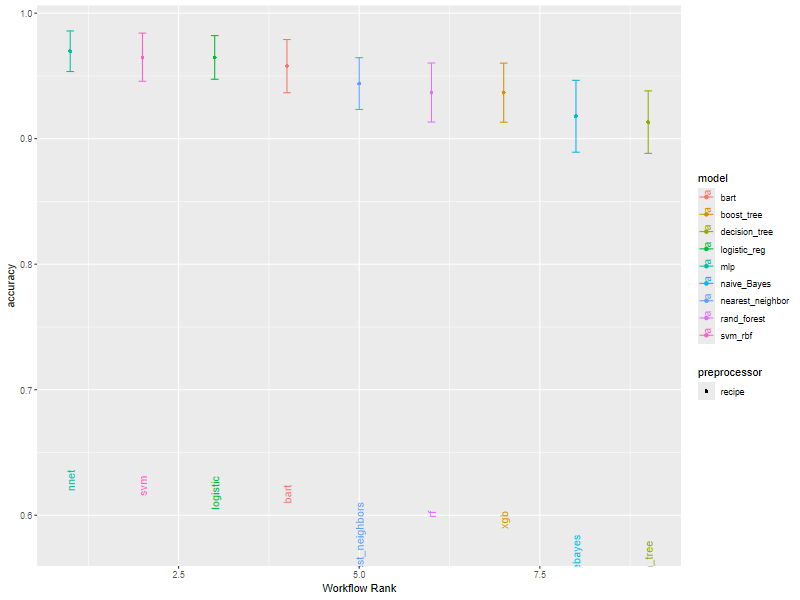

In [140]:
autoplot(race_results,
  rank_metric = "accuracy",
  metric = "accuracy",
  select_best = TRUE) +
  geom_text(aes(y = mean - 1/3, label = wflow_id), angle = 90, hjust = 1) 

In [141]:
# Extract all metrics and predictions
all_metrics <- collect_metrics(race_results)
all_predictions <- collect_predictions(race_results)
# 1. Overall Performance Comparison
overall_comparison <- race_results %>%
  collect_metrics() %>%
  group_by(wflow_id, .metric) %>%
  summarise(
    mean_perf = mean(mean),
    sd_perf = sd(mean),
    .groups = "drop"
  ) %>%
  arrange(wflow_id, mean_perf)

overall_comparison

# A tibble: 45 × 4
   wflow_id      .metric     mean_perf  sd_perf
   <chr>         <chr>           <dbl>    <dbl>
 1 bart          brier_class    0.0409 0.00419 
 2 bart          specificity    0.935  0.00873 
 3 bart          accuracy       0.954  0.00358 
 4 bart          sensitivity    0.965  0.00514 
 5 bart          roc_auc        0.992  0.000487
 6 decision_tree brier_class    0.0846 0.00151 
 7 decision_tree specificity    0.861  0.00469 
 8 decision_tree accuracy       0.901  0.00607 
 9 decision_tree roc_auc        0.920  0.00886 
10 decision_tree sensitivity    0.924  0.00969 
# ℹ 35 more rows
# ℹ Use `print(n = ...)` to see more rows

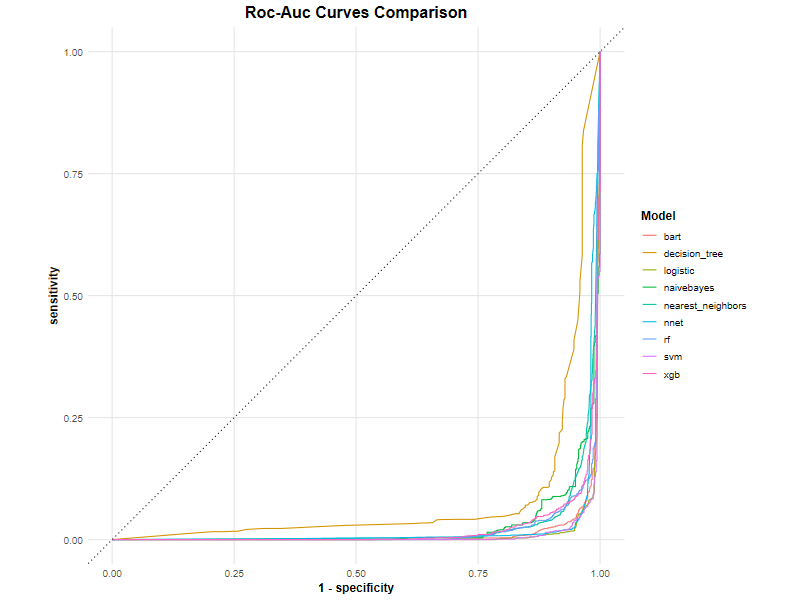

In [142]:
# 2. ROC Curves Comparison
roc_curves <- all_predictions %>%
  group_by(wflow_id) %>%
  roc_curve(truth = diagnosis, .pred_Malignant) %>%
  autoplot() +
  theme_custom() +
  labs(
      title = "Roc-Auc Curves Comparison",
      color = "Model"
    )

roc_curves

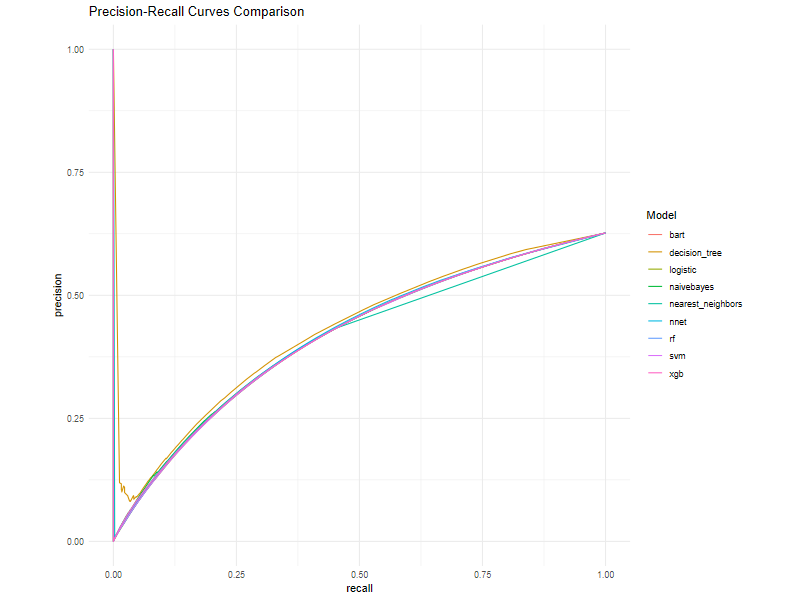

In [143]:
# 3. Precision-Recall Curves
pr_curves <- all_predictions %>%
  group_by(wflow_id) %>%
  pr_curve(truth = diagnosis, .pred_Malignant) %>%
  autoplot() +
  theme_minimal() +
  labs(
    title = "Precision-Recall Curves Comparison",
    color = "Model"
  )
pr_curves

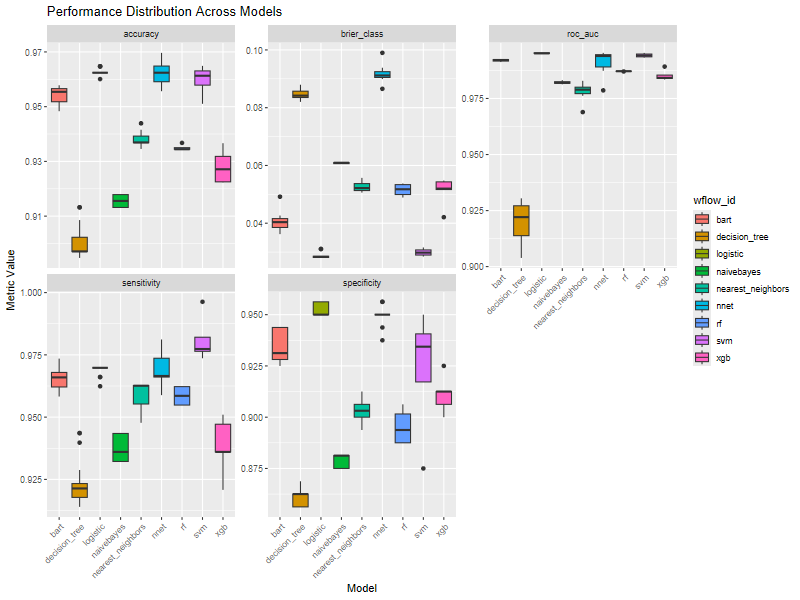

In [144]:
# 4. Performance Distribution Boxplots
metric_distributions <- all_metrics %>%
  ggplot(aes(x = wflow_id, y = mean, fill = wflow_id)) +
  geom_boxplot() +
  facet_wrap(~.metric, scales = "free_y") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(
    title = "Performance Distribution Across Models",
    x = "Model",
    y = "Metric Value"
  )

metric_distributions

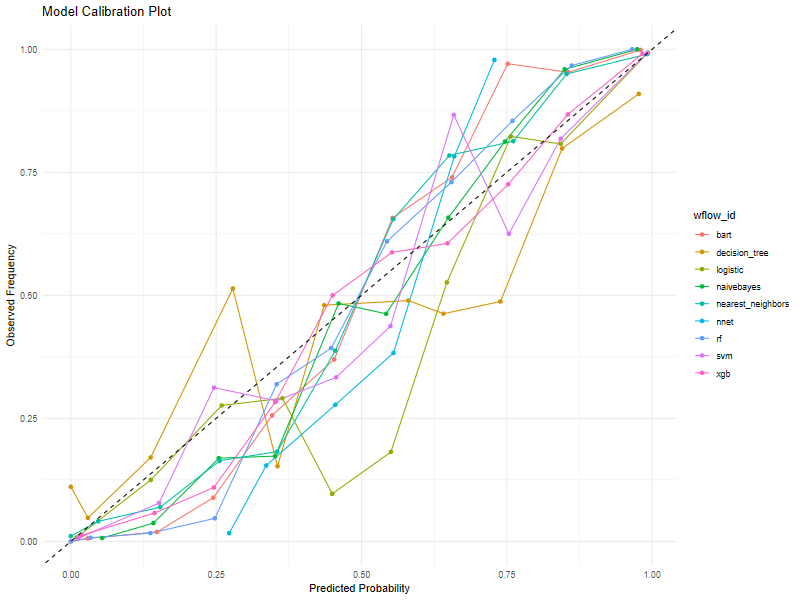

In [145]:
# 5. Model Calibration
calibration_plots <- all_predictions %>%
  group_by(wflow_id) %>%
  mutate(pred_bin = cut(.pred_Malignant, breaks = seq(0, 1, by = 0.1))) %>%
  group_by(wflow_id, pred_bin) %>%
  summarise(
    observed_prob = mean(diagnosis == "Malignant"),
    predicted_prob = mean(.pred_Malignant),
    .groups = "drop"
  ) %>%
  ggplot(aes(x = predicted_prob, y = observed_prob, color = wflow_id)) +
  geom_line() +
  geom_point() +
  geom_abline(linetype = "dashed") +  # Ideal calibration line
  theme_minimal() +
  labs(title = "Model Calibration Plot", x = "Predicted Probability", y = "Observed Frequency")

calibration_plots

In [159]:
# 6. Model Rankings
model_rankings <- all_metrics %>%
  group_by(.metric, wflow_id) %>%
  summarise(mean = mean(mean), .groups = "drop") %>%
  mutate(rank = rank(-mean)) %>%
  pivot_wider(names_from = .metric, values_from = c(mean, rank)) %>%
  arrange(rank_roc_auc) %>%
  kable(caption = "Average model rankings based on selected metrics")

print(model_rankings)




Table: Average model rankings based on selected metrics

|wflow_id          | mean_accuracy| mean_brier_class| mean_roc_auc| mean_sensitivity| mean_specificity| rank_accuracy| rank_brier_class| rank_roc_auc| rank_sensitivity| rank_specificity|
|:-----------------|-------------:|----------------:|------------:|----------------:|----------------:|-------------:|----------------:|------------:|----------------:|----------------:|
|logistic          |     0.9626303|        0.0285696|    0.9952012|        0.9690598|        0.9518750|            13|               45|            1|               11|               19|
|svm               |     0.9596332|        0.0299150|    0.9942285|        0.9811610|        0.9234375|            15|               44|            2|                8|               28|
|bart              |     0.9540465|        0.0408565|    0.9919999|        0.9654050|        0.9348214|            18|               43|            3|               12|               25|
|nnet 

In [148]:
# Ensure `wflow_id` is a factor (categorical variable)
all_metrics <- all_metrics %>%
  mutate(wflow_id = as.factor(wflow_id))

# Ensure each fold is treated as a blocking factor
# Create `id` to represent the blocking factor (folds)
all_metrics <- all_metrics %>%
  mutate(id = rep(1:floor(n()/length(unique(wflow_id))),
                  each = length(unique(wflow_id)), length.out = n()))

# Filter only rows where `.metric` is "roc_auc"
roc_metrics <- all_metrics %>%
  filter(.metric == "roc_auc")

# Ensure `mean` (roc_auc values) is numeric
roc_metrics <- roc_metrics %>%
  mutate(mean = as.numeric(mean))

# Check for missing values
missing_data <- roc_metrics %>%
  group_by(id, wflow_id) %>%
  summarise(n = n(), .groups = "drop") %>%
  pivot_wider(names_from = wflow_id, values_from = n)


# Create properly formatted data for Friedman test
friedman_data <- roc_metrics %>%
  select(id, wflow_id, mean) %>%  
  pivot_wider(
    names_from = wflow_id,
    values_from = mean
  )


# Perform Friedman test
friedman_result <- friedman.test(as.matrix(friedman_data[,-1]))

print("\nFriedman test results:")
print(friedman_result)

# If Friedman test is significant, perform post-hoc analysis
if(friedman_result$p.value < 0.05) {
  # Perform pairwise Wilcoxon signed rank tests with p-value adjustment
  posthoc <- all_metrics %>%
    wilcox_test(
      mean ~ wflow_id,
      paired = TRUE,
      p.adjust.method = "bonferroni"
    )
  
  print("\nPost-hoc analysis results:")
  print(posthoc)
}


Warning message:
Values from `mean` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} |>
  dplyr::summarise(n = dplyr::n(), .by = c(id, wflow_id)) |>
  dplyr::filter(n > 1L) 
Warning message:
In matrix(unlist(split(c(y), blocks)), ncol = k, byrow = TRUE) :
  data length [82] is not a sub-multiple or multiple of the number of rows [10]


[1] "\nFriedman test results:"

	Friedman rank sum test

data:  as.matrix(friedman_data[, -1])
Friedman chi-squared = 2.3873, df = 8, p-value = 0.9668



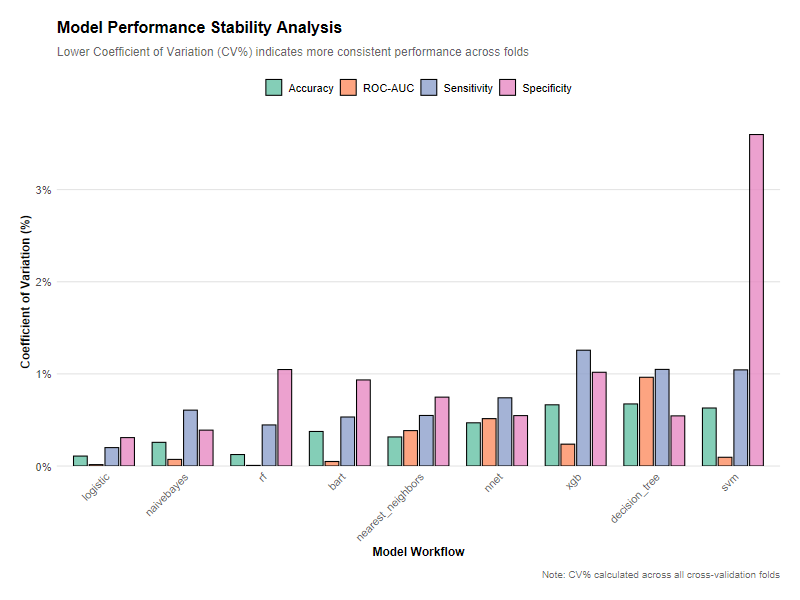

In [149]:
# Stability Plot Analysis
stability_plot <- all_metrics %>%
  # Filter for relevant metrics
  filter(.metric %in% c("accuracy", "roc_auc", "sensitivity", "specificity")) %>%
  # Calculate stability metrics
  group_by(wflow_id, .metric) %>%
  summarise(
    mean_perf = mean(mean),
    sd_perf = sd(mean),
    cv = sd_perf / mean_perf * 100,
    .groups = "drop"
  ) %>%
  # Create plot
  ggplot(aes(x = reorder(wflow_id, cv), y = cv, fill = .metric)) +
  geom_col(position = position_dodge(width = 0.8),
           width = 0.7,
           color = "black",
           alpha = 0.8) +
  # Custom color palette
  scale_fill_brewer(palette = "Set2",
                    labels = c("Accuracy", "ROC-AUC", "Sensitivity", "Specificity")) +
  # Formatting
  scale_y_continuous(
    #limits = c(0, max(cv) * 1.1),
    labels = function(x) paste0(round(x, 1), "%"),
    expand = expansion(mult = c(0, 0.05))
  ) +
  # Clean theme
  theme_minimal(base_size = 12, base_family = "Arial") +
  theme(
    plot.title = element_text(size = 16, face = "bold", margin = margin(b = 10)),
    plot.subtitle = element_text(size = 12, color = "grey40", margin = margin(b = 20)),
    plot.caption = element_text(size = 10, color = "grey40", margin = margin(t = 10)),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 11),
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    legend.position = "top",
    legend.title = element_blank(),
    legend.text = element_text(size = 11),
    legend.margin = margin(b = 10),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_line(color = "grey90"),
    plot.margin = margin(20, 20, 20, 20)
  ) +
  # Labels
  labs(
    title = "Model Performance Stability Analysis",
    subtitle = "Lower Coefficient of Variation (CV%) indicates more consistent performance across folds",
    x = "Model Workflow",
    y = "Coefficient of Variation (%)",
    caption = "Note: CV% calculated across all cross-validation folds"
  )

# Display the plot
stability_plot

In [150]:
performance_table <- overall_comparison %>%
  arrange(desc(mean_perf)) %>% # Sort by performance
  kable(format = "html", digits = 3, caption = "Model Performance Summary") %>%
  kable_styling(full_width = FALSE, bootstrap_options = c("striped", "hover", "condensed")) %>%
  row_spec(0, bold = TRUE) %>%  # Make header bold
  column_spec(2:3, width = "15em") %>% # Adjust column width
  pack_rows("Top Performing Models", 1, 3, label_row_css = "font-weight: bold; background-color: #e6f3ff;") # Highlight top 3

In [153]:
best_results <- race_results %>% 
  extract_workflow_set_result("nnet") %>% 
  select_best(metric = "accuracy")

print(best_results)



# A tibble: 1 × 4
  hidden_units   penalty epochs .config              
         <int>     <dbl>  <int> <chr>                
1           10 0.0000486    932 Preprocessor1_Model14


In [154]:
race_results %>% 
  extract_workflow("nnet") %>% 
  finalize_workflow(best_results) %>% 
  last_fit(split = splits) -> final_fit


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
[[1]]
# A tibble: 3 × 4
  .metric     .estimator .estimate .config             
  <chr>       <chr>          <dbl> <chr>               
1 accuracy    binary        0.937  Preprocessor1_Model1
2 roc_auc     binary        0.986  Preprocessor1_Model1
3 brier_class binary        0.0958 Preprocessor1_Model1

[[2]]



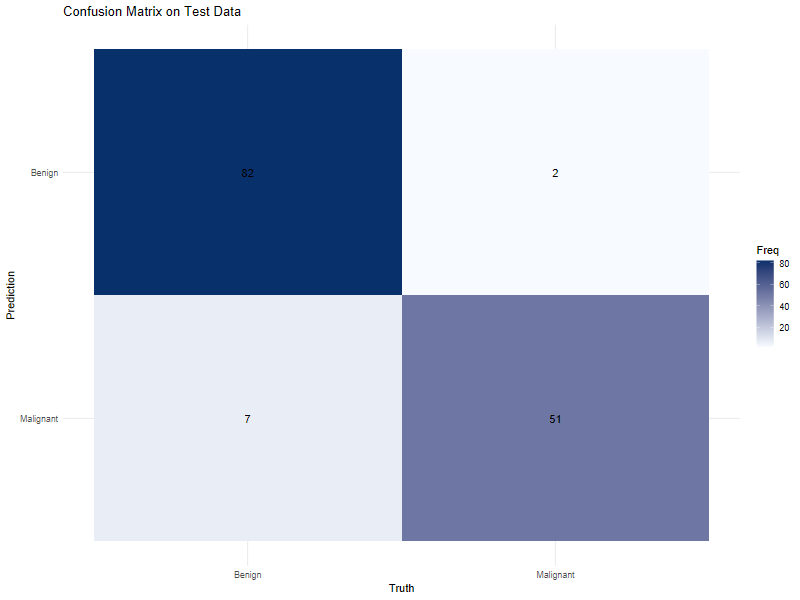

In [155]:
final_fit %>% 
  collect_predictions() %>% 
  conf_mat(truth = diagnosis, 
      estimate = .pred_class) -> conf_mat

confusion_matrix <- conf_mat %>%
  autoplot(type = "heatmap") +
  labs(title = "Confusion Matrix on Test Data") +
  scale_fill_gradient(low = "#f7fbff", high = "#08306b") +
  theme_minimal()

final_metrics <- collect_metrics(final_fit)
print(list(final_metrics, confusion_matrix))

